# Final Results - <b>General Results</b>
Before moving on to a detailed analysis of each condition, it is important to get a **better understanding of the metrics that will be discussed, how their results were calculated and what they represent**. Consequently, this document focuses only on a general view of the types of results that will be analyzed later on, and, although it provides a broad view of all the outputs, it does not intend to explore specific aspects of each condition. Any other type of analysis that may be implemented will be explained in that condition's respective document.

<br>


In [181]:
### IMPORT LIBRARIES ###

# Python libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import qgrid

# Modules created by me
import VTP_tools
import h5_tools

# Figures style
%matplotlib inline
sns.set()
sns.set_context("notebook")
from jupyterthemes import jtplot
jtplot.style()

### Importing results from the h5/VTP files
There are two types of data that can be analyzed: the **"raw" results from the VTPs**, and the **computed metrics stored in the .h5 files**. Both of these were imported into Python **DataFrames** (created using the Pandas library), resulting in two DataFrames with the following structure:

- **h5Data** - Each row represents a time point, and each column represents a metric. Thus, there are $710*24*5$ rows (number of time points * number of samples * number of simulations). Regarding the columns, these include:
    - Time point;
    - Simulation and sample number;
    - Parameters:
        - ECM stiffness (kECM);
        - Rate of disassembly (pFA_rev);
        - Lifetime associated to the rate of disassembly (lt_FA0);
    - Desired outputs:
        - Number of total FAs, as well as the number of FAs at the back and front of the cell (nFA, nFA_back, nFA_front);
        - Mean lifetime of the adhesions (lt_FA0);
        - Number of ruptured FAs (rpdFA);
        - Maturation level of the stress fibers (multFam);
        - Traction exerted by the cell on the substrate (trac_cell);
        - Center of mass of the cell - x coordinate only (CoM).
        
        <br>
        
- **VTPData** - DataFrame for a single sample, where each row represents a node, but the number of rows depends on the number of time points the user specifies when calling the function (there is too much information in each time point, and it is not necessary to extract information from all of them, hence the user can select only some points, representative of the part of the simulation it is trying to showcase). Regarding the columns, these include:
    - Time point;
    - Node's ID;
    - Node's coordinates (x, y and z);
    - Whether there is a FA at that node or not (atFA).
    
<br>

These DataFrames will serve different purposes. On one side, **VTPData** will be used to visualize the cell's 3D form, or a 2D view of that representation, in order to comprehend better what the model looks like at a certain time point. On the other hand, **h5Data** will mainly provide a quantitative view of the simulations. Combined, they allow for a more comprehensive understanding of the model. Nevertheless, there are still metrics that need to be calculated, and which will be included in the DataFrames throughout this document. 

In [164]:
### EXTRACT DATA FROM H5 FILE 
simNumbers = range(0, 5)
dataPath = 'AON_FON/pstudy/'
data, params = h5_tools.geth5Data(simNumbers, path = dataPath)

qgrid_widget = qgrid.show_grid(data)
qgrid_widget

UWdyaWRXaWRnZXQoZ3JpZF9vcHRpb25zPXsnaGlnaGxpZ2h0U2VsZWN0ZWRSb3cnOiBUcnVlLCAnZnVsbFdpZHRoUm93cyc6IFRydWUsICdyb3dIZWlnaHQnOiAyOCwgJ2VuYWJsZUNvbHVtblLigKY=


In [124]:
### EXTRACT DATA FROM VTP FILE  
timeNumbers = [0, 350, 700]
dataPath = 'AON_FON/extract_files'
sampleNumber = 20

nodesData = VTP_tools.getNodesData(timeNumbers, dataPath + '/sample_' + str(sampleNumber).zfill(2) + '/')

# Display DataFrame
qgrid_widget = qgrid.show_grid(nodesData)
qgrid_widget

UWdyaWRXaWRnZXQoZ3JpZF9vcHRpb25zPXsnaGlnaGxpZ2h0U2VsZWN0ZWRSb3cnOiBUcnVlLCAnZnVsbFdpZHRoUm93cyc6IFRydWUsICdyb3dIZWlnaHQnOiAyOCwgJ2VuYWJsZUNvbHVtblLigKY=


Having stored the data in a way that it can be easily accessed and represented, the analysis can be conducted, starting with the displacement of the cell.

<br>


## Displacement of the cell 
As stated previously, the purpose of this document is to only showcase different ways to visualize results and not to analyze them. Having this in mind, the questions that will be addressed are more related to how the cell migrates and how the various aspects of its movement can be expressed through a chart.

Even though there are different conditions, which have an effect on migration, a similar behaviour can be found in all samples. Putting it simply, **cells start at an initial position, in a spread state, and move along the x axis**, the dominant direction for migration in this model, **until reaching a new position**, as reflected by the figure below, which consists of the cell’s position at the start, middle and end of the simulation for the sample with the most displacement.

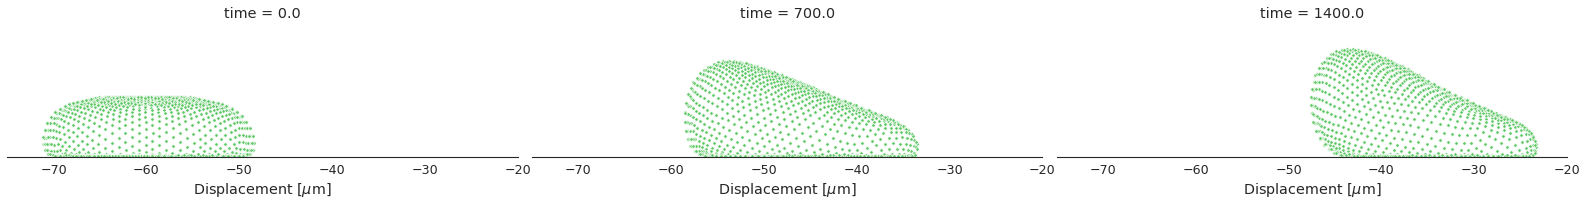

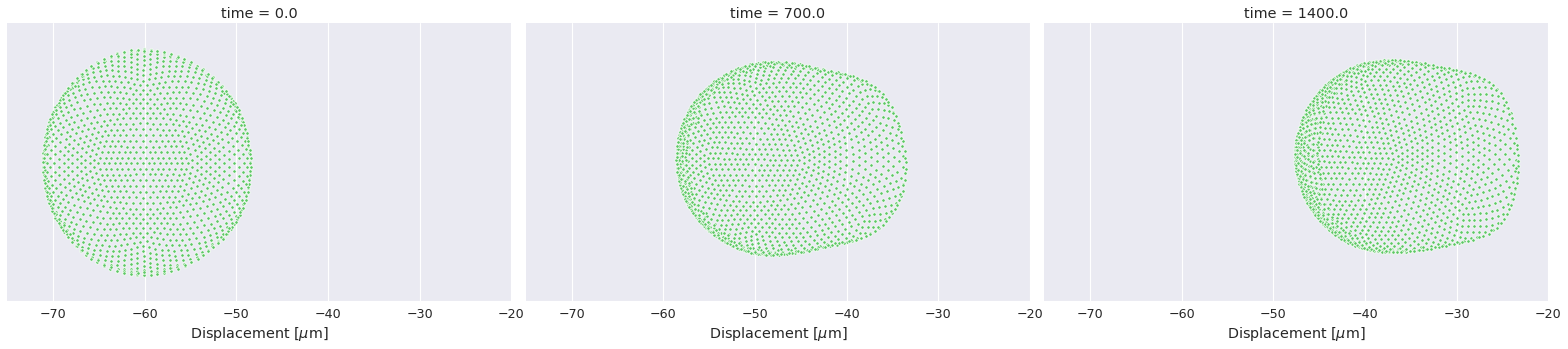

In [317]:
### PLOT NODES DATA ###
nodesData = VTP_tools.getNodesData([0, 350, 700], 'AON_FON/extract_files/sample_20/')

VTP_tools.plotNodes2DSubplots(nodesData, view='XZ')
VTP_tools.plotNodes2DSubplots(nodesData)

Knowing that this is the general motion of the cell, two main aspects can be studied and can be used to differentiate samples, as well as characterize how the different parameters affect migration: **how much they move**, and the **type of motion they adopt**.

<br>

### Final Displacement - How much do cells migrate
Starting by quantifying the displacement, since the cells mainly move in the x direction, it can be achieved by calculating the **difference between the cell's position at the end of the simulation and the position at the start**. In this case, it was defined that this difference would be calculated using the **x coordinate of the cell's center of mass.** Accordingly, the figure below represents a cell's initial and final position, overlapped, accompanied by a line connecting the center of mass at those two time points and the corresponding displacement value, which eases the comprehension of how much the cell actually moves. Two examples are provided, one for one of the cells that migrate the most (left), and one for a cell with almost no migration (right).

It must be noted that the value used for the final position is actually an average of the last five values, in order to reduce errors introduced by fluctuations.

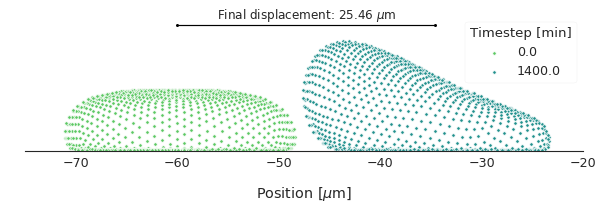

In [160]:
### PLOT FINAL DISPLACEMENT - SAMPLE 21 ###
nodesData = VTP_tools.getNodesData([0, 350, 700], 'AON_FON/extract_files/sample_20/')

VTP_tools.plotFinalDisp(nodesData, data, 20)

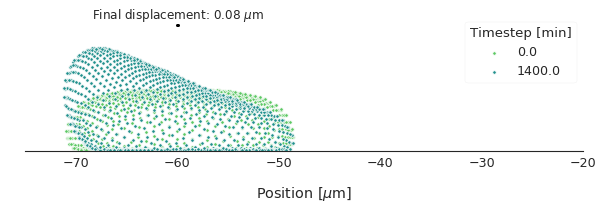

In [168]:
### PLOT FINAL DISPLACEMENT - SAMPLE 01 ###
nodesData = VTP_tools.getNodesData([0, 350, 700], 'AON_FON/extract_files/sample_01//')

VTP_tools.plotFinalDisp(nodesData, data, 1)

Using this final displacement value, it is already possible to compare different samples in terms of how much they migrate. Therefore, a new DataFrame, **finalMetrics** was created to store these final values, as well as other final metrics that will be calculated throughout this document. Similarly to **h5Data**, it includes the simulation and sample number, as well as the corresponding parameters and final results.

Once this information is accessible and ready to use, it is important to decide how to display it in a clear and intuitive way. Three different options were selected, which are represented in the plots below:

- **2D errorbar** with the mean value of the final displacement for the 5 simulations, as well as the SEM;
- **3D surface plot** with the mean value of the final average for the 5 simulations;
- **2D heatmap** with the mean value of the final average for the 5 simulations.

<br>

(Note: the final values are an average value of the final values for the 5 simulations).

<Figure size 1440x720 with 0 Axes>

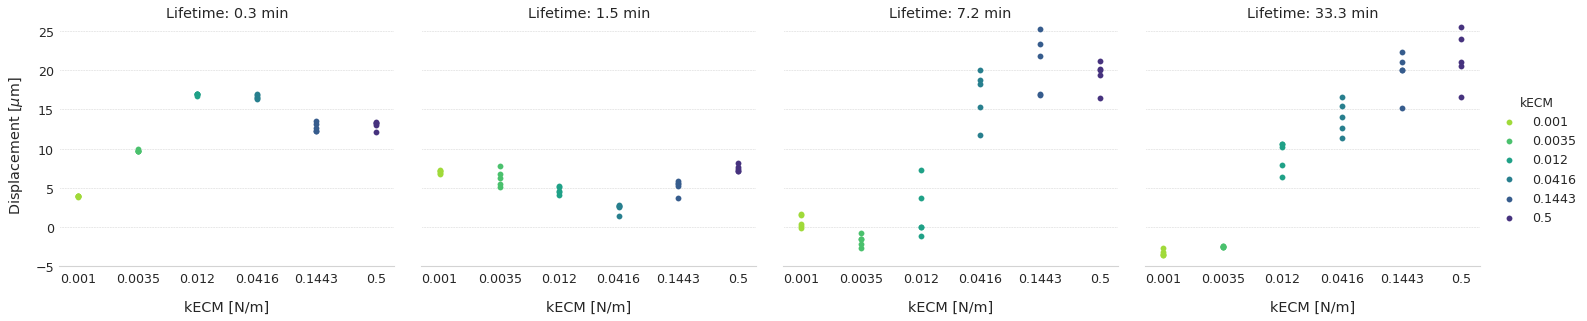

<Figure size 1440x720 with 0 Axes>

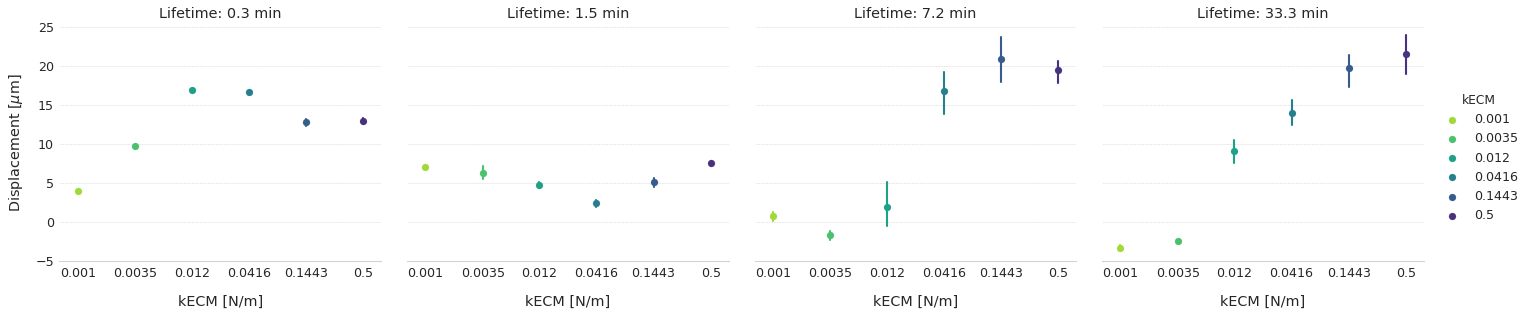

In [246]:
### PLOT DISPLACEMENT - FINAL VALUE ###

h5_tools.plotFinalDisp(data, 'all')
h5_tools.plotFinalDisp(data)

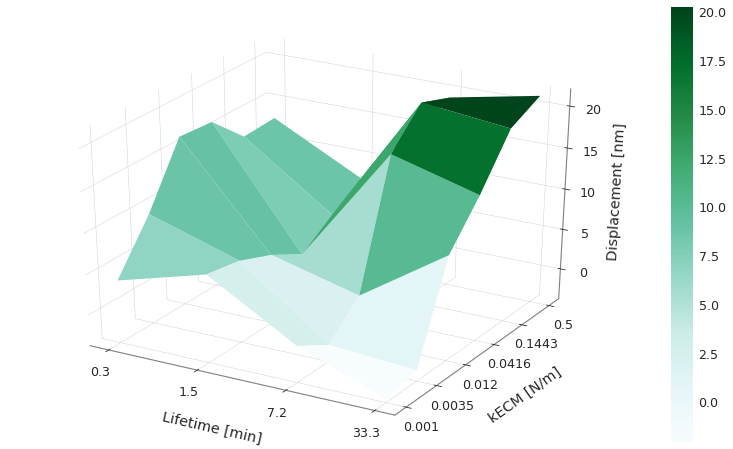

In [120]:
### 3D FINAL DISP ###

h5_tools.plotMetric3D('final_disp', data)

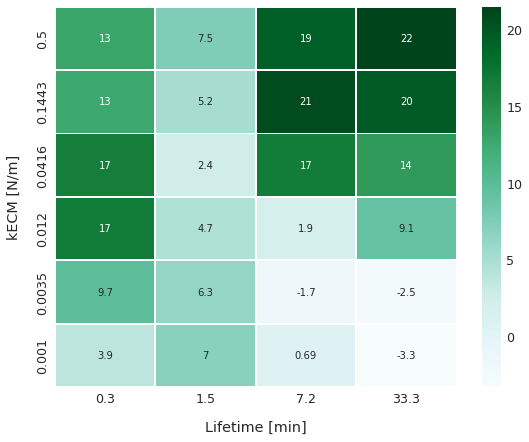

In [71]:
### HEATMAP FINAL DISP ###
h5_tools.plotMetricHeatMap('final_disp', data, params)

In this case, **it is better not to choose just one of these plots, as they have different advantages and can provide more insights in different contexts**. For instance, the 2D errorbar is helpful when analyzing the samples in different groups, according to their initial lifetime, while the 3D plot is useful to look into the results as a whole. Likewise, the 3D plot has the advantage of using height as a way to further differentiate results, but that also makes it more difficult to visualize certain regions. Nonetheless, if the 2D is also shown, the combination of the two plots provides an in-depth description of the results.

<br>

### Types of displacement plots - How do cells migrate
Despite being a valuable metric, analyzing the final displacement of a cell will not reveal how the cell moved until reaching its final position. In fact, knowing that there are **different migration mechanisms**, it would be interesting to analyze this model's results and sort them accordingly. Before doing so, however, is is necessary to do some calculations. 

Remembering the data stored in the h5Data DataFrame, it includes the position of the cell's center of mass through time, which could be plotted in terms of time to provide an idea of the cell's displacement. However, to make it more intuitive, a new column will be created, with a cumulative sum of the center of mass' differences, or, in other words, **how much the cell is moving, disregarding its position**. As an example, if before there was a position of -60 $\mu$m at the start and a position of -40 $\mu$m at the end, the start position will be 0 and the final position will be 20 $\mu$m.

In [ ]:
### CALCULATE CUMSUM DISPLACEMENT

With this "new" metric, the displacement through time can be calculated, as seen in the figure below:

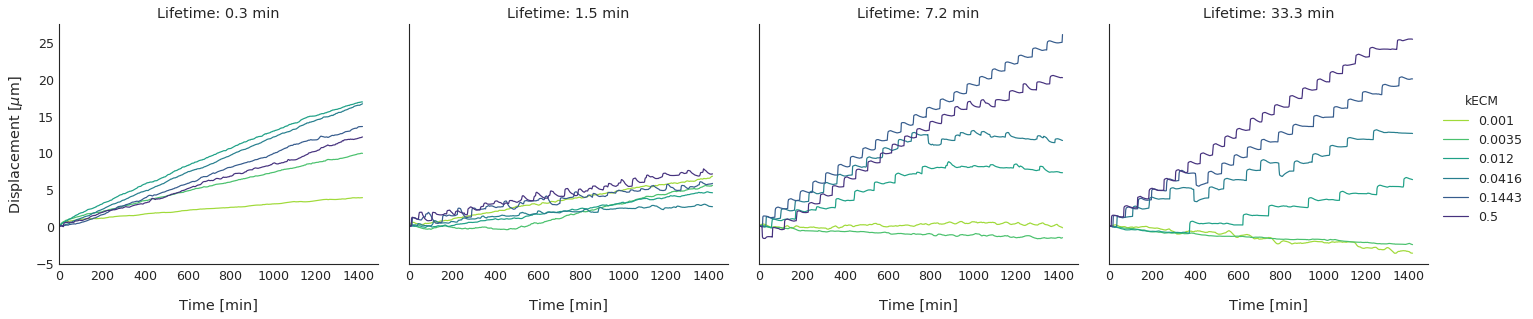

In [244]:
h5_tools.plotDisp(data)

As expected, there are **different curve types**, which can roughly be divided three groups:
- **Smooth, slow but consistently increasing curves**;
- **Curves with step-like behaviour occurring multiple times**;
- **Curves with almost no, or even negative, steep**;

Focusing on the two first types, a representation of each curve is present below. The displacement curve on the left is relatively smooth, meaning that, from one time point to another, **there is not a large difference in displacement**. Relating it to a migrating cell, it can be thought as the center of mass, and, consequently, the cell, **constantly moving forward**. On the other hand, the figure on the left represents a curve with a stable value for a period of time, followed by an  **abrupt change in displacement**, that in turn returns to a stable value, and the cycle begins again. Once again, thinking about a migrating cell, the stable value indicates that the cell **does not move for that period of time, until, suddenly, it moves a lot, and then stops for some minutes once again**.

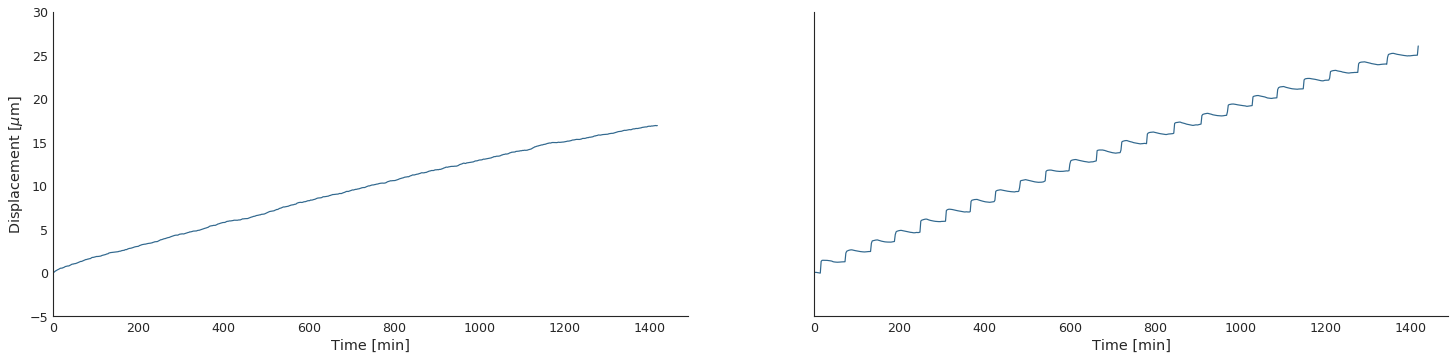

In [169]:
## DISPLACEMENT EXAMPLE PLOT ###
sns.set_style("white")
sns.set_palette('viridis_r',2)
fig, ax = plt.subplots(1, 2, sharey = True, sharex = True)
fig.set_figwidth(25)

# Plot displacement
ax[0].plot(data["time"][data["sim_num"] == 1][data["samp_num"] == 11], data["sum_disp"][data["sim_num"] == 1][data["samp_num"] == 11], color='C1')
ax[1].plot(data["time"][data["sim_num"] == 1][data["samp_num"] == 17], data["sum_disp"][data["sim_num"] == 1][data["samp_num"] == 17], color='C1')

# Figure aesthetics
ax[0].set_ylim(-5, 30)
ax[0].set_ylabel('Displacement [$\mu$m]')
ax[0].set_xlim(0, None)
ax[0].set_xlabel('Time [min]')
ax[1].set_xlabel('Time [min]')
sns.despine(fig)

Taking this approach one step forward, a small time interval was selected, in which it was possible to observe both behaviours in detail. Simultaneously, the **nodes' position for both samples was plotted**, using **time points that were considered to be relevant to characterize the cell's motion** (chosen based on the step-like curve: a point at the base of the jump; another when the jump occurs; one some moments after the jump; a final point, some time after the jump, once the value has stabilized and another jump is close to occur).

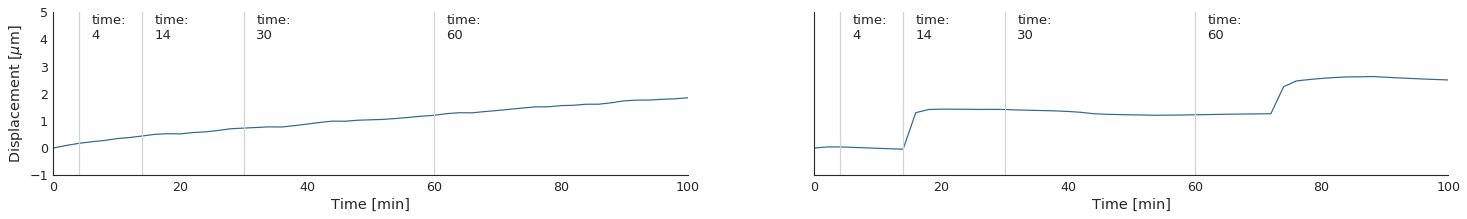

In [178]:
### DISPLACEMENT EXAMPLE PLOT (ZOOMED IN) ###
sns.set_style("white")
sns.set_palette('viridis_r',2)
fig, ax = plt.subplots(1, 2, sharey = True, sharex = True)
fig.set_figwidth(25)
fig.set_figheight(3)

# Plot displacement
ax[0].plot(data["time"][data["sim_num"] == 1][data["samp_num"] == 11], data["sum_disp"][data["sim_num"] == 1][data["samp_num"] == 11], color='C1')
for vl in [4, 14, 30, 60]:
    ax[0].axvline(vl, color='lightgray')
    ax[0].text(vl + 2, 4, 'time:\n' + str(vl))
ax[1].plot(data["time"][data["sim_num"] == 1][data["samp_num"] == 17], data["sum_disp"][data["sim_num"] == 1][data["samp_num"] == 17], color='C1')
for vl in [4, 14, 30, 60]:
    ax[1].axvline(vl, color='lightgray')
    ax[1].text(vl + 2, 4, 'time:\n' + str(vl))

# Figure aesthetics
ax[0].set_ylim(-1, 5)
ax[0].set_ylabel('Displacement [$\mu$m]')
ax[0].set_xlim(0, 100)
ax[0].set_xlabel('Time [min]')
ax[1].set_xlabel('Time [min]')
sns.despine(fig)

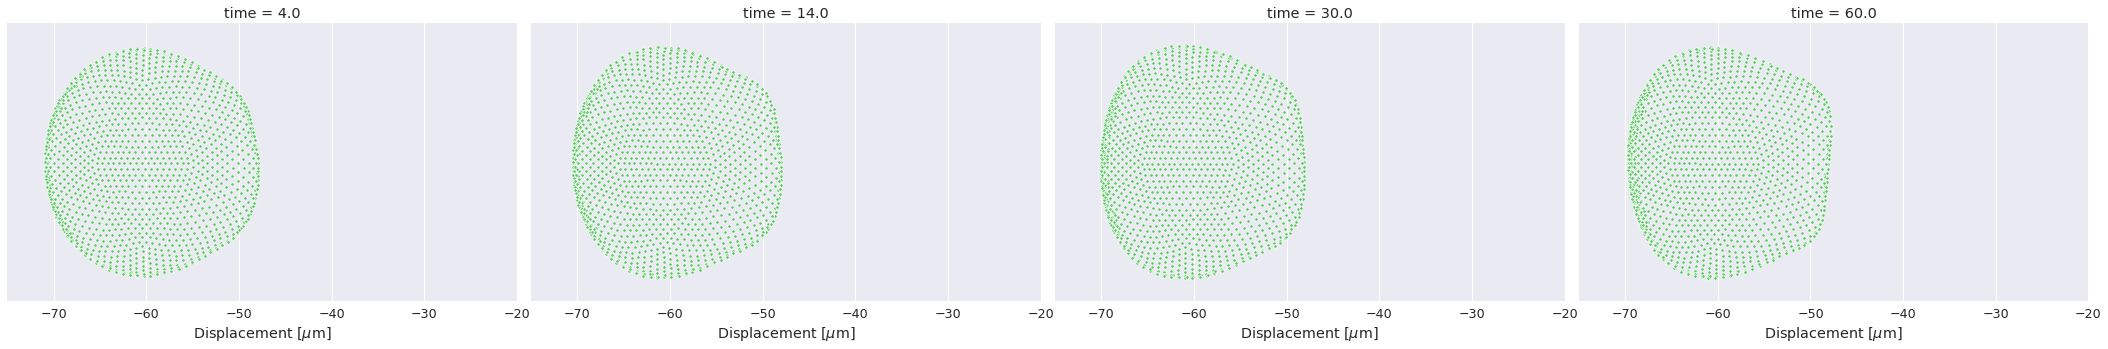

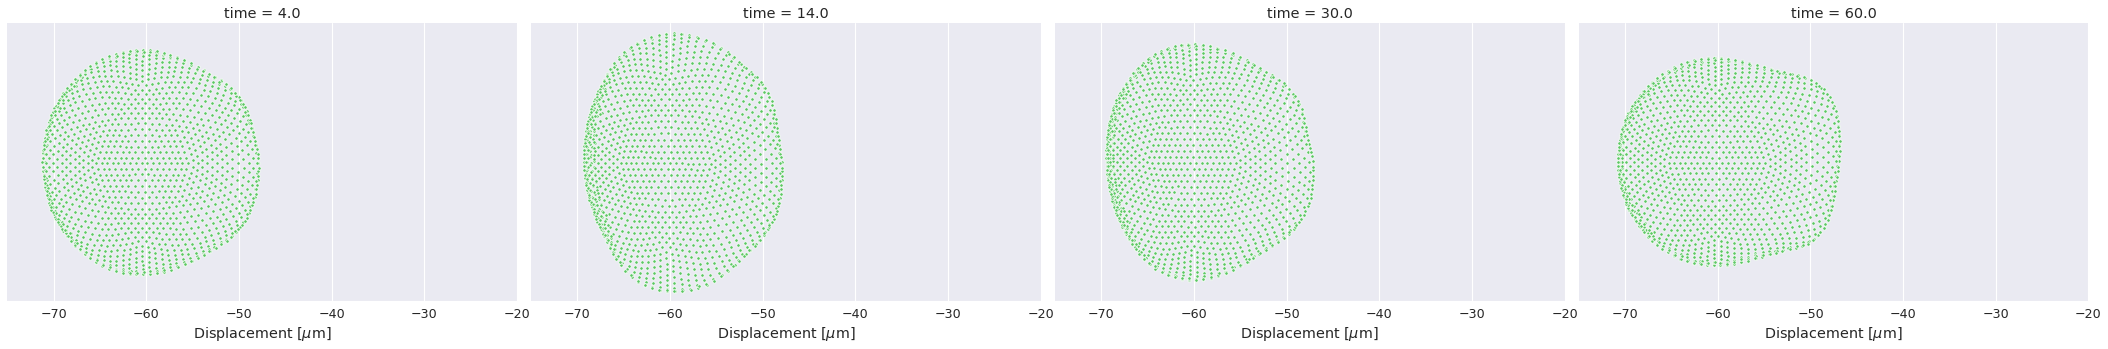

In [179]:
### JUMP CHARACTERIZATION ###
nodesData20 = VTP_tools.getNodesData([2, 7, 15, 30], 'AON_FON/extract_files/sample_20/')
nodesData11 = VTP_tools.getNodesData([2, 7, 15, 30], 'AON_FON/extract_files/sample_11/')
VTP_tools.plotNodes2DSubplots(nodesData11)
VTP_tools.plotNodes2DSubplots(nodesData20)

Combining the information from the .h5 and VTP files, it is possible to conclude that:
- The first curve type corresponds to a more **"protrusion"-driven migration type**, where the cell's shape does not change a lot through the simulation;
- The second curve type corresponds to a **"contraction-based migration type**, with the steps corresponding to the moment the back of the cell contracts, making the center of mass move forward. Since the cell spreads before contracting once again, that moment corresponds to the stabilization of the values seen in the plots.

<br>

#### Contraction-based migration - What information can we get from the jumps
As seen in the plot with the displacement values for all samples, inside the **contraction-based** group there is still some variability: some samples have **more jumps**, while others have jumps that are **less noticeable**, and there are even **negative jumps**. Therefore, it is relevant to study each of those aspects and, in order to do so, **identifying the time points at which jumps occur is required.**

As presented before, it is useful to think about the differences between time points. Samples with smooth curves will have low differences values, whereas samples with step-like curves will have peaks in the differences values. In order to show this, the figure below includes the differences in displacement for samples of both types.

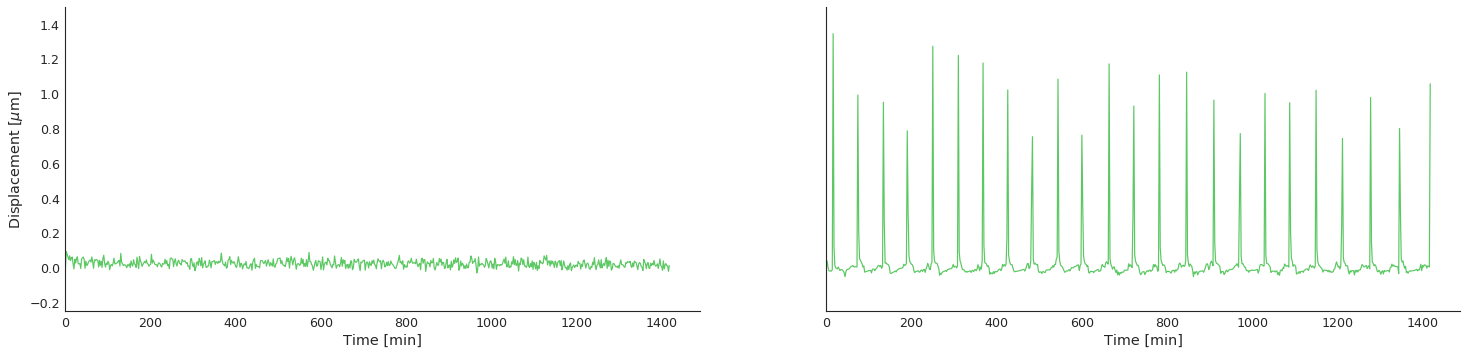

In [318]:
### DISPLACEMENT DIFFERENCES EXAMPLE PLOT ###
# Figure definition
sns.set_style("white")
sns.set_palette('viridis_r',3)
fig, ax = plt.subplots(1, 2, sharey = True, sharex = True)
fig.set_figwidth(25)

# Plot displacement differences
ax[0].plot(data["time"][data["sim_num"] == 1][data["samp_num"] == 11], data["diff_disp"][data["sim_num"] == 1][data["samp_num"] == 11], color = 'C0')
ax[1].plot(data["time"][data["sim_num"] == 1][data["samp_num"] == 17], data["diff_disp"][data["sim_num"] == 1][data["samp_num"] == 17], color = 'C0')

# Figure aesthetics
ax[0].set_ylim(-.25, 1.5)
ax[0].set_ylabel('Displacement [$\mu$m]')
ax[0].set_xlim(0, None)
ax[0].set_xlabel('Time [min]')
ax[1].set_xlabel('Time [min]')
#ax[0].set_title('Differences in displacement for a sample with no jumps \n[Sim. 1, Sample 11]', weight = 'bold')
#ax[1].set_title('Differences in displacement for a sample with jumps \n[Sim. 1, Sample 17]', weight = 'bold')
sns.despine(fig)

From the observation of these plots, it can be concluded that identifying contractions can be pretty straightforward, by using an approach consisting of defining a **minimum threshold** of, for instance, .6 $\mu$m and storing every time point with a corresponding difference above that value. Nonetheless, not all samples have jumps as well-defined as this example, and there are some contractions that may not reach that minimum but are still relevant. Indeed, these differences can also be a way of studying the **cell's overall shape through the simulation** and sorting samples according to **whether the cell maintains its original shape or deforms through the simulation**

Therefore, the selected strategy to identify the most significant contractions, while still accounting for minor changes in the cell's form, consists of defining two groups: **"full"** and **"partial**" contractions, and defining minimum thresholds for both of them. Moreover, to prevent duplicates (some minor jumps may appear in pairs of two small peaks, but in truth only correspond to one contraction), a minimum time window of 60 minutes between jumps was set. Both these requirements are met by the **find_peaks()** function from the **SciPy** library, making it adequate and a good option to use, as it is already optimized.

The plots below represent, respectively, the thresholds used to define partial and full jumps (.1 and .4), and the jumps the function identified after applying said thresholds.

<Figure size 1800x288 with 0 Axes>

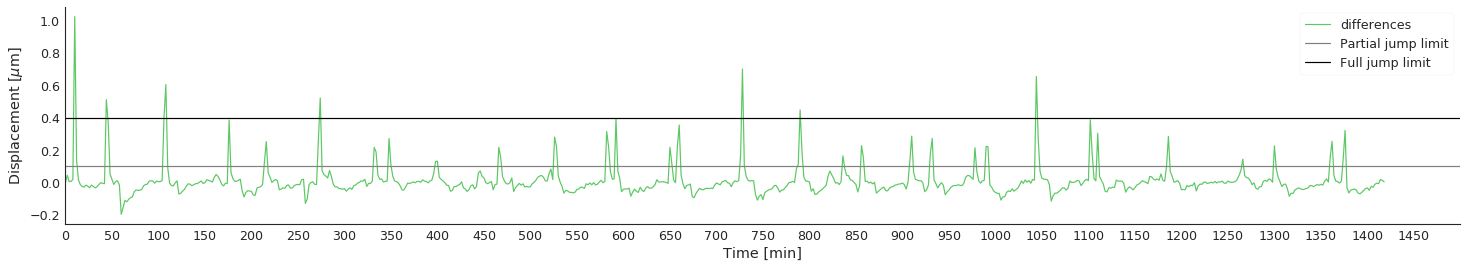

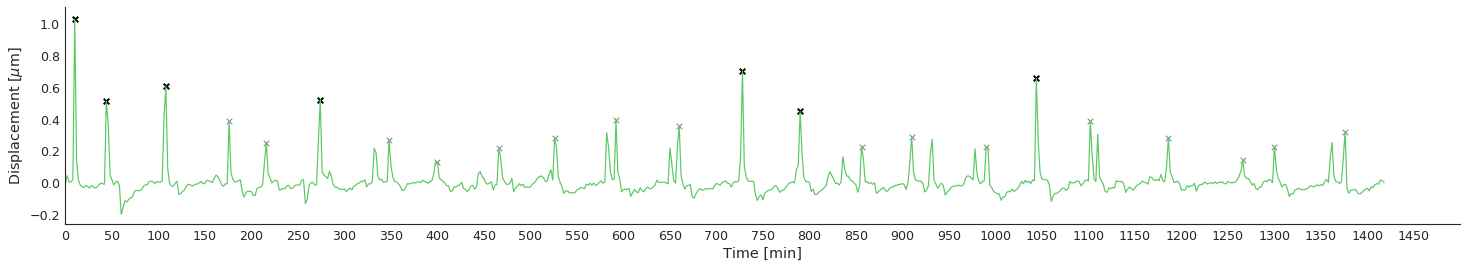

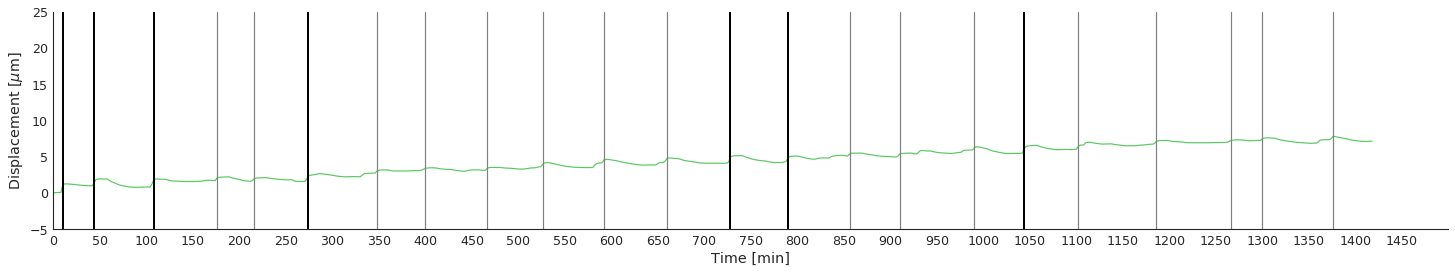

In [296]:
### FALSE JUMPS EXAMPLE PLOT - FIND_PEAKS() ###
# Import the required library
from scipy.signal import find_peaks

# Figure definition
sns.set_style('white')
sns.set_palette('viridis_r',3)
fig = plt.figure(figsize = (25,4))

fig = plt.figure(figsize = (25,4))

num = 22

# Plot displacement differences
plt.plot(data["time"][data["sim_num"] == 1][data["samp_num"] == 22], data["diff_disp"][data["sim_num"] == 1][data["samp_num"] == num], color = 'C0', label = 'differences')

plt.axhline(.1, color='gray', label='Partial jump limit')
plt.axhline(.4, color='black', label='Full jump limit')

# Figure aesthetics
#plt.ylim(-.25, None)
plt.ylabel('Displacement [$\mu$m]')
plt.xlim(0, 1500)
plt.xlabel('Time [min]')
plt.legend()
#plt.title('Differences for a sample ' + str(num) + '\n[With jumps - Using find_peaks() with a distance of 30 min; full jumps defined by a height of .4; partial by a height of [.1, .4]', fontweight = 'bold')
plt.xticks(np.arange(0, 1500, 50.0))
sns.despine()

fig = plt.figure(figsize = (25,4))

num = 22

# Plot displacement differences
plt.plot(data["time"][data["sim_num"] == 1][data["samp_num"] == 22], data["diff_disp"][data["sim_num"] == 1][data["samp_num"] == num], color = 'C0', label = 'differences')

# Setting a threshold (minimum only, to prevent a small jump appearing next to a big one)
jumps, _ = find_peaks(abs(data['diff_disp'])[data['sim_num'] == 1][data['samp_num'] == num], distance = 15, height = .1)

# Differentiating small and big jumps
partial_jumps = jumps[data['diff_disp'][data['sim_num'] == 1][data['samp_num'] == num].iloc[jumps] < .4]
full_jumps = jumps[data['diff_disp'][data['sim_num'] == 1][data['samp_num'] == num].iloc[jumps] >= .4]

# Small adjusment because of the timestep
partial_jumps = partial_jumps*2
full_jumps = full_jumps*2

# Plotting the jumps
for jump in full_jumps:
    
    plt.scatter(jump, data["diff_disp"][data["sim_num"] == 1][data["samp_num"] == num][data['time'] == jump], color = 'black', linewidth = 2, marker = 'x', label = "full jumps")
    
for jump in partial_jumps:
    
    plt.scatter(jump, data["diff_disp"][data["sim_num"] == 1][data["samp_num"] == num][data['time'] == jump], color='gray', linewidth = 1, marker = 'x', label = "partiall jumps")

# Figure aesthetics
#plt.ylim(-.25, None)
plt.ylabel('Displacement [$\mu$m]')
plt.xlim(0, 1500)
plt.xlabel('Time [min]')
#plt.title('Differences for a sample ' + str(num) + '\n[With jumps - Using find_peaks() with a distance of 30 min; full jumps defined by a height of .4; partial by a height of [.1, .4]', fontweight = 'bold')
plt.xticks(np.arange(0, 1500, 50.0))
sns.despine()

fig = plt.figure(figsize = (25,4))

# Plot displacement differences
plt.plot(data["time"][data["sim_num"] == 1][data["samp_num"] == 22], data["sum_disp"][data["sim_num"] == 1][data["samp_num"] == num], color = 'C0', label = 'differences')

for jump in full_jumps:
    
    plt.axvline(jump, color = 'black', linewidth = 2, label = "full jumps")
    
for jump in partial_jumps:
    
    plt.axvline(jump, color='gray', label = "partiall jumps")

# Figure aesthetics
plt.ylim(-5, 25)
plt.ylabel('Displacement [$\mu$m]')
plt.xlim(0, 1500)
plt.xlabel('Time [min]')
#plt.title('Displacement for a sample ' + str(num) + '\n[With jumps - Using find_peaks() with a distance of 30 min; full jumps defined by a height of .4; partial by a height of [.1, .4]', fontweight = 'bold')
plt.xticks(np.arange(0, 1500, 50.0))
sns.despine()

This data will be stored in two data containers:
- **jumpsValues** - Dictionary with three main layers:
    - Simulations;
        - Samples;
            - Jump groups - stores the actual time points at which jumps occur, for the different jump types:
                - Jumps - all jumps for that sample and simulation;
                - Full jumps;
                - Partial jumps;
                - Negative jumps.
                
    (For instance, jumpsValues[3][21]['full_jumps'] stores the full jumps of sample 21 for simulation number 3).
    
<br>
    
- **jumpsInfo** - DataFrame with summarized data about the jumps, in which each row corresponds to a sample. Columns include:
    - Simulation number;
    - Sample number;
    - Parameters;
    - Jumps Data:
        - Number of jumps;
        - Number of full jumps;
        - Number of partial jumps;
        - Number of negative jumps;
        - Time at which the first jump occurs;
        - Mean time of each jump;
        - Standard deviation of the time of each jump;
        
<br>

Although **jumpsInfo** comprises the necessary information to compare different samples in terms of their jumps, **jumpsValues** will still important be important to calculate other metrics, and should not be ignored.

In [233]:
### GET JUMPS
jumpsValues, jumpsInfo = h5_tools.getJumps(data)

qgrid_widget = qgrid.show_grid(jumpsInfo)
qgrid_widget

UWdyaWRXaWRnZXQoZ3JpZF9vcHRpb25zPXsnaGlnaGxpZ2h0U2VsZWN0ZWRSb3cnOiBUcnVlLCAnZnVsbFdpZHRoUm93cyc6IFRydWUsICdyb3dIZWlnaHQnOiAyOCwgJ2VuYWJsZUNvbHVtblLigKY=


Generally, the metrics jumpsInfo includes can be analyzed through the types of plots shown before: **errorbars, surface plots and heatmaps**, which will not be plotted in this document as they do not add anything new in terms of visualization. However, a new type of plot can be introduced to help in comparing the number of total, full and partial jumps: **barplots**, as proven by the figure below.

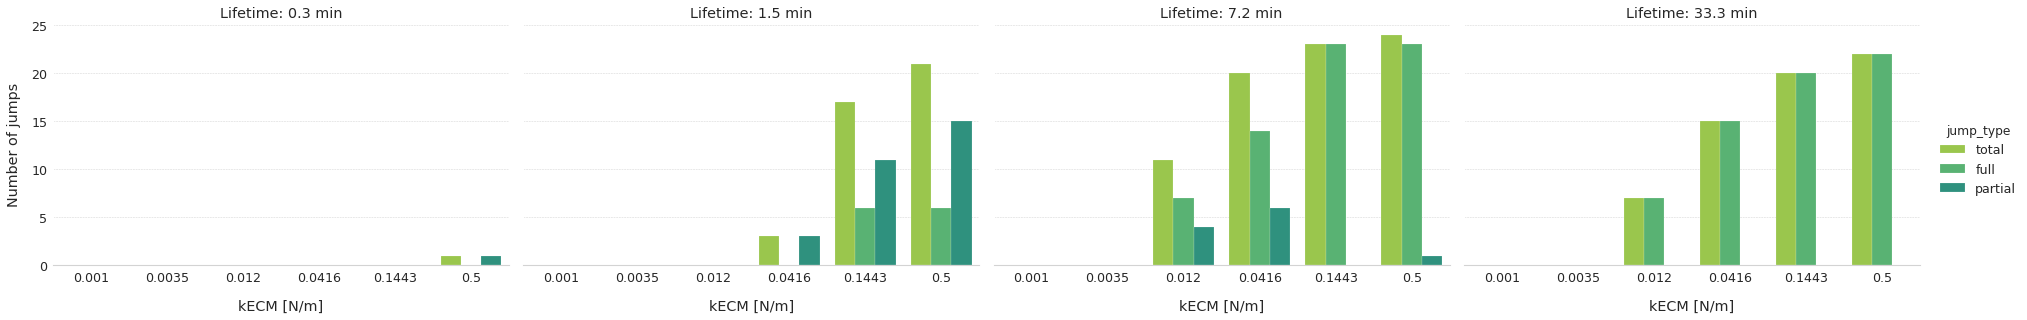

In [268]:
### BAR PLOT
import warnings
warnings.filterwarnings('ignore')

sns.set_palette('viridis_r', 6)

newJumpsInfo = pd.DataFrame(np.nan, index=range(0,24*3), columns=['sim_num', 'samp_num', 'kECM', 'lt_FA0', 'jump_type', 'jump_num'])

for samp in range(0,24):
    newJumpsInfo['sim_num'][samp*3:samp*3 + 3] = 1
    newJumpsInfo['samp_num'][samp*3:samp*3 + 3] = samp 
    newJumpsInfo['kECM'][samp*3:samp*3 + 3] = jumpsInfo[jumpsInfo['sim_num'] == 1][jumpsInfo['samp_num'] == samp]['kECM'].to_numpy()[0]
    newJumpsInfo['lt_FA0'][samp*3:samp*3 + 3] = jumpsInfo[jumpsInfo['sim_num'] == 1][jumpsInfo['samp_num'] == samp]['lt_FA0'].to_numpy()[0]
    newJumpsInfo['jump_type'][samp*3] = 'total'
    newJumpsInfo['jump_type'][samp*3 + 1] = 'full'
    newJumpsInfo['jump_type'][samp*3 + 2] = 'partial'
    newJumpsInfo['jump_num'][samp*3] = int(jumpsInfo[jumpsInfo['sim_num'] == 1][jumpsInfo['samp_num'] == samp]['jumps_num'])
    newJumpsInfo['jump_num'][samp*3 + 1] = int(jumpsInfo[jumpsInfo['sim_num'] == 1][jumpsInfo['samp_num'] == samp]['full_jump_num'])
    newJumpsInfo['jump_num'][samp*3 + 2] = int(jumpsInfo[jumpsInfo['sim_num'] == 1][jumpsInfo['samp_num'] == samp]['partial_jump_num'])
    
g = sns.catplot(x="kECM", y="jump_num",
                hue="jump_type", col="lt_FA0",
                data=newJumpsInfo, kind="bar",
                height=4.5, aspect=1.5)

(g.set_ylabels('Number of jumps', labelpad=10)
 .set_xlabels('kECM [N/m]', labelpad=15)
 .set_titles("Lifetime: {col_name} min"))  

for i in range(0, 4):
    g.axes.flatten()[i].yaxis.grid(color='lightgray', linestyle='--', linewidth=0.5)
    g.axes.flatten()[i].spines.values()[0].set_edgecolor('white')
    g.axes.flatten()[i].spines.values()[2].set_edgecolor('lightgray')

#### No migration - is the cell moving backwards?
Judging from the displacements plots for the lowest stiffnesses and highest lifetimes, it appears as if the cell is **constantly, yet slowly, moving in the opposite direction**. However, plotting the nodes' position at the start and end of the simulation provides an explanation to these results. To make the plots clearer, the XY view will only consist of the nodes at the border of the cell.

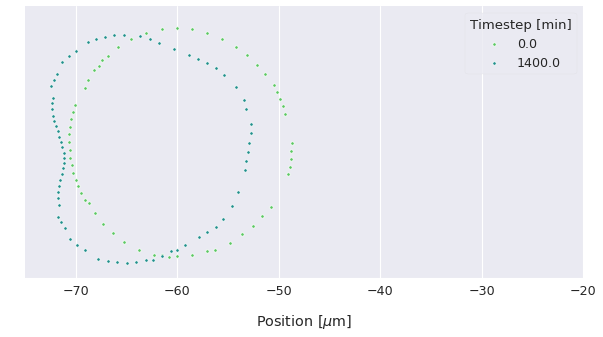

In [255]:
### JUMP CHARACTERIZATION ###
nodesData00 = VTP_tools.getNodesData([0, 700], 'AON_FON/extract_files/sample_00/', )
nodesData00 = nodesData00[nodesData00['z'] < 0.3]
VTP_tools.plotNodes2DOverlapped(nodesData00)

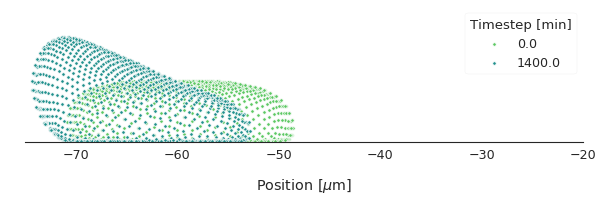

In [256]:
### JUMP CHARACTERIZATION ###
nodesData00 = VTP_tools.getNodesData([0, 700], 'AON_FON/extract_files/sample_00/', )
VTP_tools.plotNodes2DOverlapped(nodesData00, view='XZ')

As seen in the figure above, it is not clear that the cell is moving backwards, as much as it is deforming. Henceforth, this aspect will be further analyzed using other metrics, but, for now, it will be characterized as having **no migration**.

<br>


### "Negative" contraction - what if all jumps were in the same direction
Regarding the "negative" jumps observed previously, which correspond to a contraction in the opposite direction to the cell's main trajectory, in a way, they represent **distances the cell is migrating but that are not being accounted for when calculating the final displacement.** Although their occurrence can in fact be a consequence of the conditions, hence being important not to disregard the fact that they occur in the opposite direction, it is also relevant to look into displacement as a whole and evaluate how much the cell migrates in total.

Accordingly, an algorithm was implemented to check, for each "full" jump, if it corresponded to a negative jump. In case it did, **the displacement between that jump and the next would be inverted**. The result is represented in the figure below.

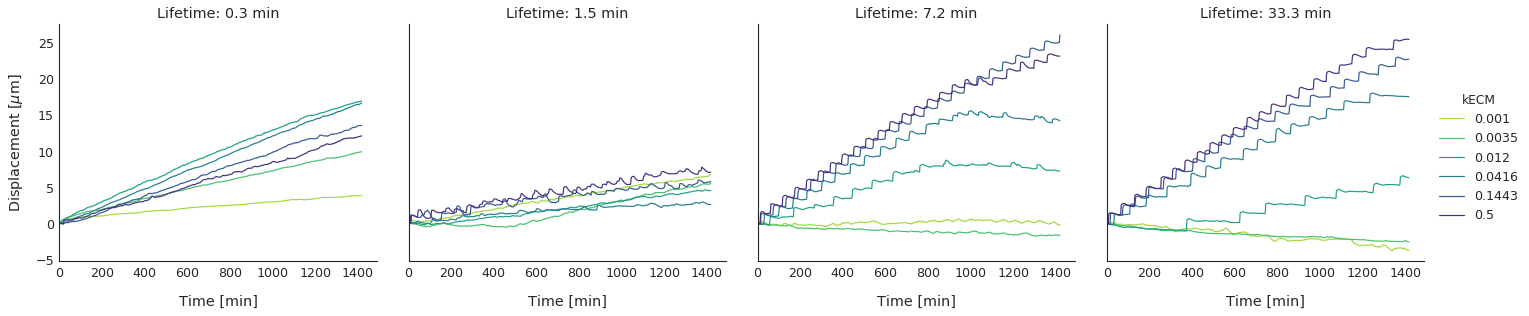

In [648]:
### ABSOLUTE MIGRATION ###
h5_tools.plotDisp(data, disp='abs_disp', sim=1)

### All simulations - plotting variability
Up to this point, almost all displacement plots have included only one simulation, because it was important to get a clear representation of the displacement curve. Yet, considering the data from all five simulations can add some insight on variability. For example, samples where **negative jumps** tend to occur probably will have more variability than samples with more positive jumps. Likewise, samples in an **interface area**, where jumps may start occurring will have more variability, since for some simulations jumps will indeed start occurring, but not for all.

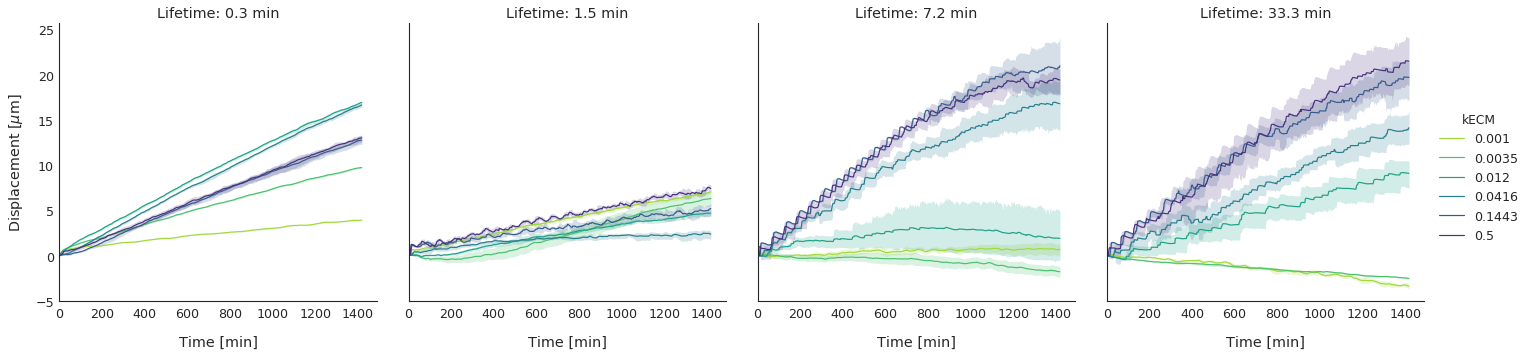

In [234]:
data = h5_tools.getAbsDisp(data, jumpsValues)
h5_tools.plotDisp(data, disp='sum_disp', mode='overlap')

## Other metrics
### Rupture
Moving to other metrics, and to deciding how to represent them, it can be concluded that the **number of ruptures of FAs**, like the migration distance, can be evaluated by comparing its final values, in all samples. In conclusion, the analysis for this metric will be done using **2D errorbars/surface plots/heatmaps**.



### Number of FAs
Similarly to what was done for comparing the displacement of each cell, it would be useful to find a representative value of the number of FAs in each sample. Nonetheless, the same approach cannot be used, as the final value (or a mean of the final values) is not adequate, as can be seen in the figure, below:

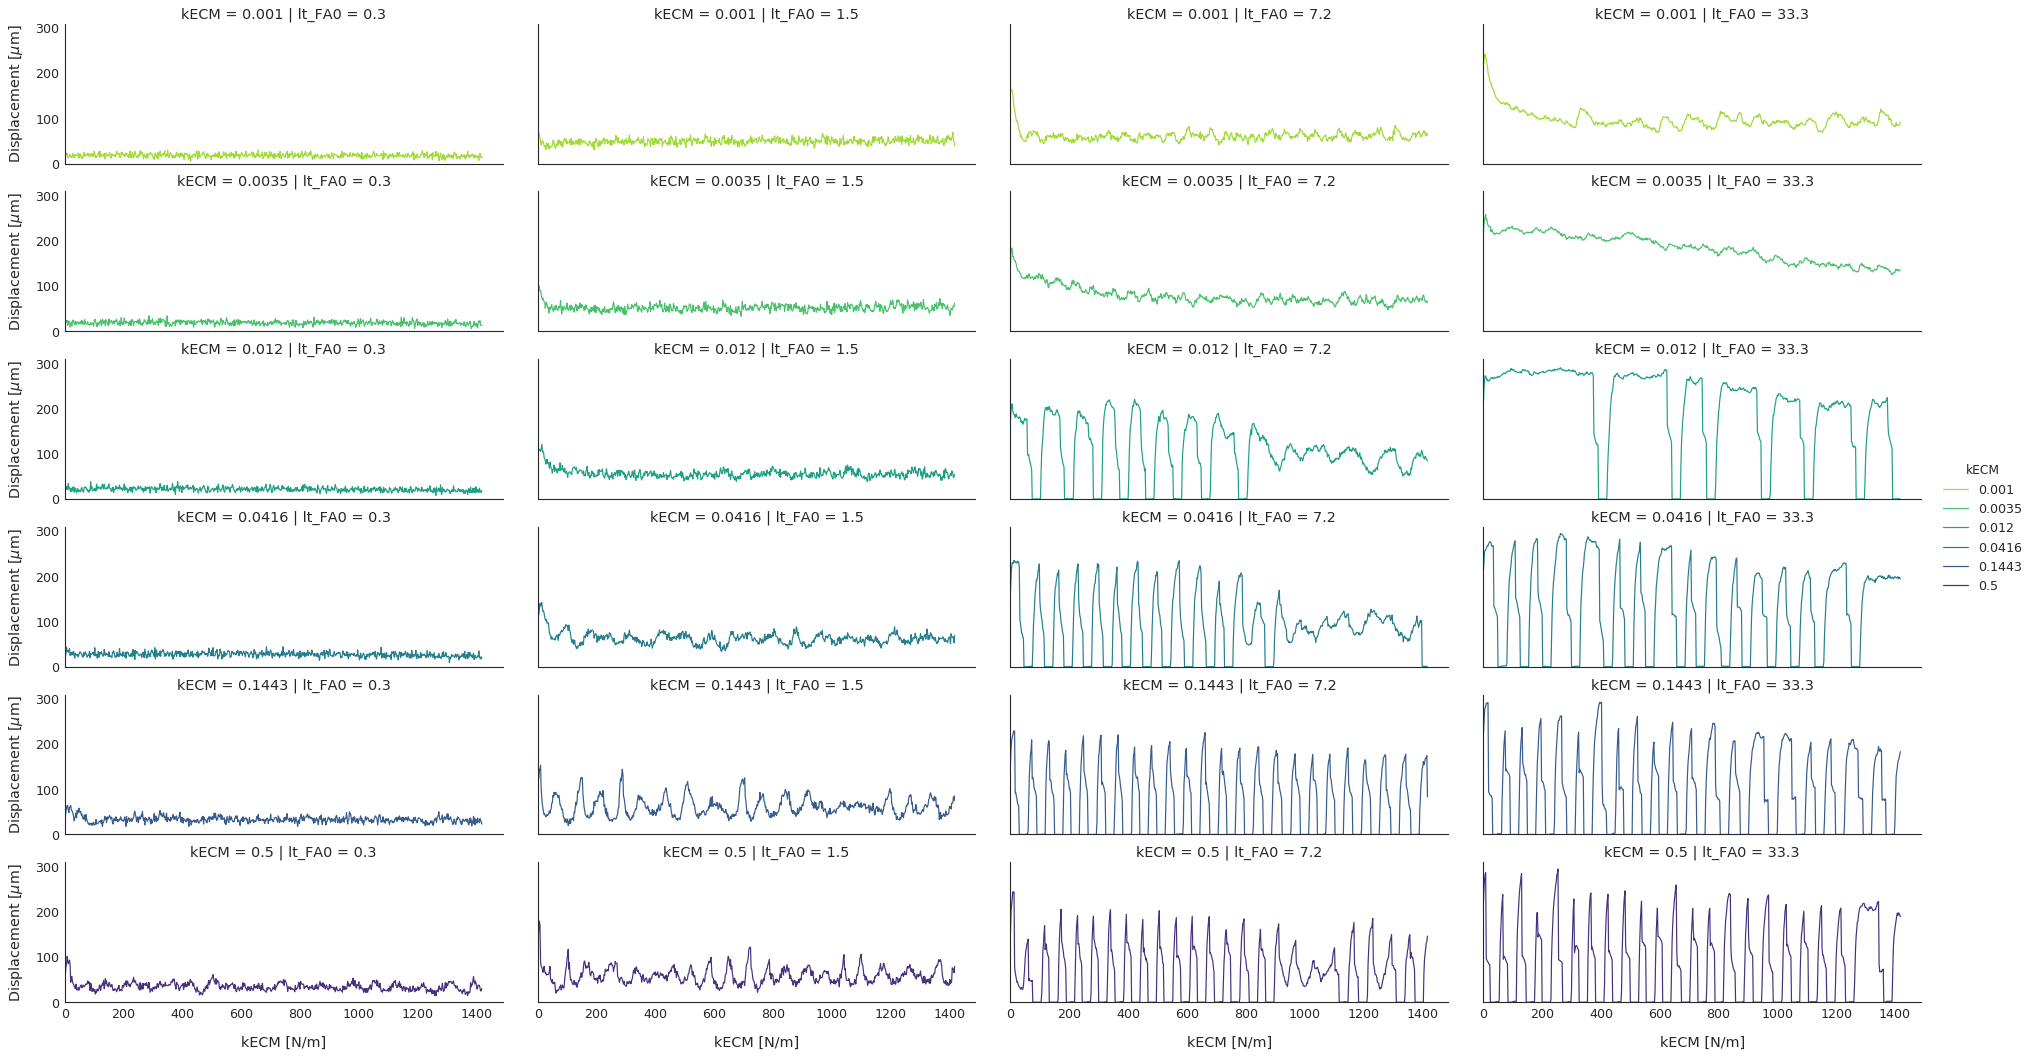

In [699]:
### NFA FINAL VALUES
g = sns.FacetGrid(data[data['sim_num'] == 1], col='lt_FA0', row="kECM", hue="kECM", aspect=2.5, size=3, gridspec_kws={"wspace": 0.08})

g = (g.map(plt.plot, "time", 'nFA')
     .add_legend()
     .set_ylabels("Displacement [$\mu$m]", labelpad=10)
     .set_xlabels("kECM [N/m]", labelpad=15)
     .set(xlim=(0,None), ylim=(0,None)))

It is possible to conclude that, for lower lifetimes (the two left columns), the number of FAs fluctuates around a certain value. Thus, it would be possible to simply calculate a mean of either the entire simulation or the last n values. Nevertheless, for higher lifetimes, in the cases where **collective rupture** occurs, for each jump the number of FAs goes high and suddenly drops, when adhesions are forced to detach. In these cases, the value immediately before detachment is more significant than a mean value of the entire signal, or part of it, as confirmed by the figures represented below:

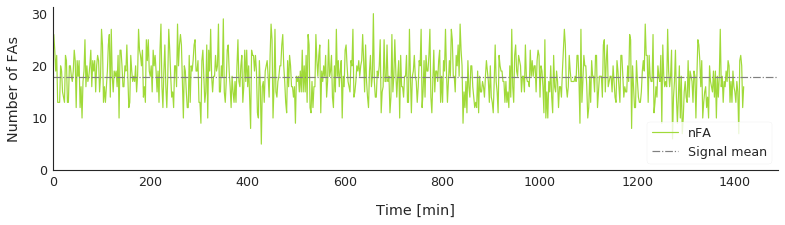

In [748]:
### NO JUMPS EXAMPLE (SAMPLE 3)
plt.figure(figsize=(13,3))
criteria1 = data['samp_num'] == 3
criteria2 = data['sim_num'] == 1
criteria = criteria1 & criteria2

meanValue = np.mean(data['nFA'][criteria])

plt.plot(data['time'][criteria], data['nFA'][criteria])
plt.axhline(meanValue, color='gray', ls='-.', label='Signal mean')
plt.xlim(0, None)
plt.ylim(0, None)
plt.xlabel('Time [min]', labelpad=15)
plt.ylabel('Number of FAs', labelpad=10)
plt.legend(loc='lower right')
sns.despine()

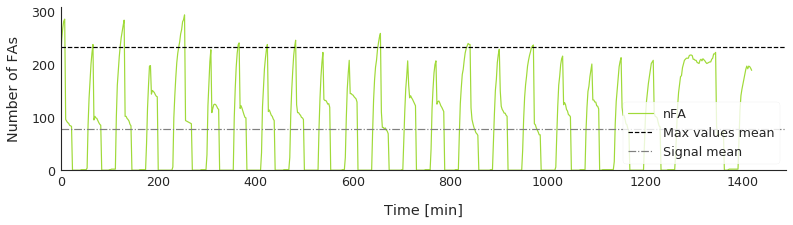

In [772]:
### JUMPS EXAMPLE (SAMPLE 20)
plt.figure(figsize=(13,3))
criteria1 = data['samp_num'] == 20
criteria2 = data['sim_num'] == 1
criteria = criteria1 & criteria2

meanValue = np.mean(data['nFA'][criteria])
meanTemp = np.zeros(np.size(jumpsValues[1][20]['full_jumps']))

for ind, jump in enumerate(jumpsValues[1][20]['full_jumps']):
    jumpRange = range(jump / 2 - 5, jump / 2 + 1)
    meanTemp[ind] = np.max(data[criteria]['nFA'].iloc[jumpRange])

topValue = np.mean(meanTemp)

plt.plot(data['time'][criteria], data['nFA'][criteria])
plt.axhline(topValue, color='black', ls='--', label='Max values mean')
plt.axhline(meanValue, color='gray', ls='-.', label='Signal mean')
plt.xlim(0, None)
plt.ylim(0, None)
plt.xlabel('Time [min]', labelpad=15)
plt.ylabel('Number of FAs', labelpad=10)
plt.legend(loc='lower right')
sns.despine()

Bearing this in mind, the results for the number of FAs for each sample are represented below:

<Figure size 1440x720 with 0 Axes>

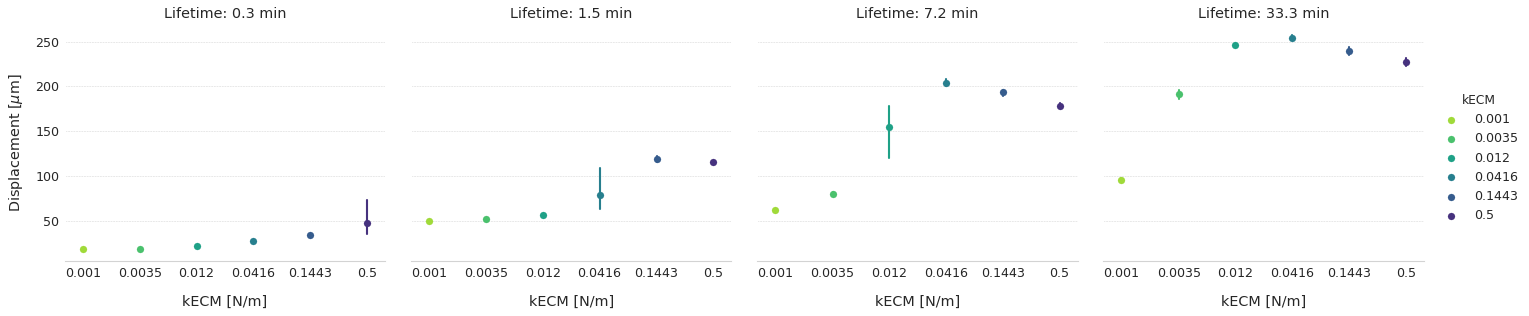

In [691]:
h5_tools.plotFinalDisp(finalMetrics, 'nFA')

A general idea of the number of FAs for each sample can be provided by this plot. However, there are some interesting aspects that can be analyzed separately.

For instance, contrary to what was concluded before, it is revealed that **a large contraction does not necessarily correspond to a collective rupture.** In fact, according to the previous analysis, there were six "full jumps" in sample 18, but, observing the plot below, those values do not correspond to moments where the adhesions detach. Therefore, the previous conclusions have to be rectified and the number of "full jumps" has to be calculated again.

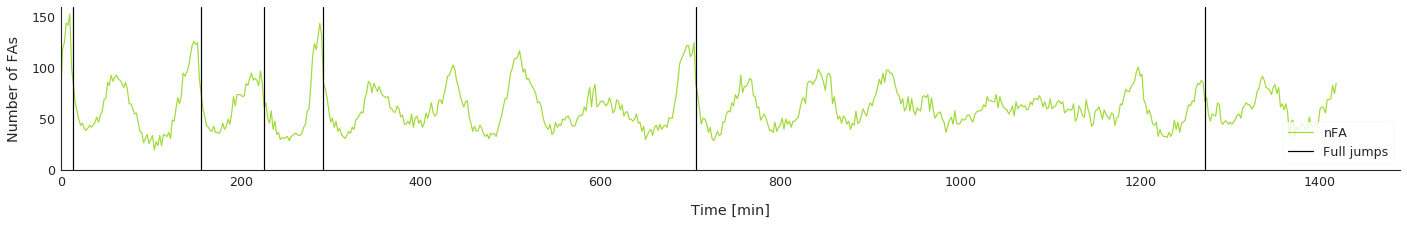

In [773]:
### NO COLLECTIVE RUPTURE EXAMPLE (SAMPLE 18)
plt.figure(figsize=(24,3))
criteria1 = data['samp_num'] == 18
criteria2 = data['sim_num'] == 1
criteria = criteria1 & criteria2

plt.plot(data['time'][criteria], data['nFA'][criteria])

for ind, jump in enumerate(jumpsValues[1][18]['full_jumps']):
    if ind == 0:
        plt.axvline(jump, color='black', label='Full jumps')
    else:
        plt.axvline(jump, color='black')

plt.xlim(0, None)
plt.ylim(0, None)
plt.xlabel('Time [min]', labelpad=15)
plt.ylabel('Number of FAs', labelpad=10)
plt.legend(loc='lower right')
sns.despine()

Another interesting aspect to analyze is the number of FAs located in the back of the cell, and how it compares to the total number of FAs. In the figure below, both the number of total FAs (full, thicker, line) and the number of FAs at the back (dashed, thinner, line) are represented.

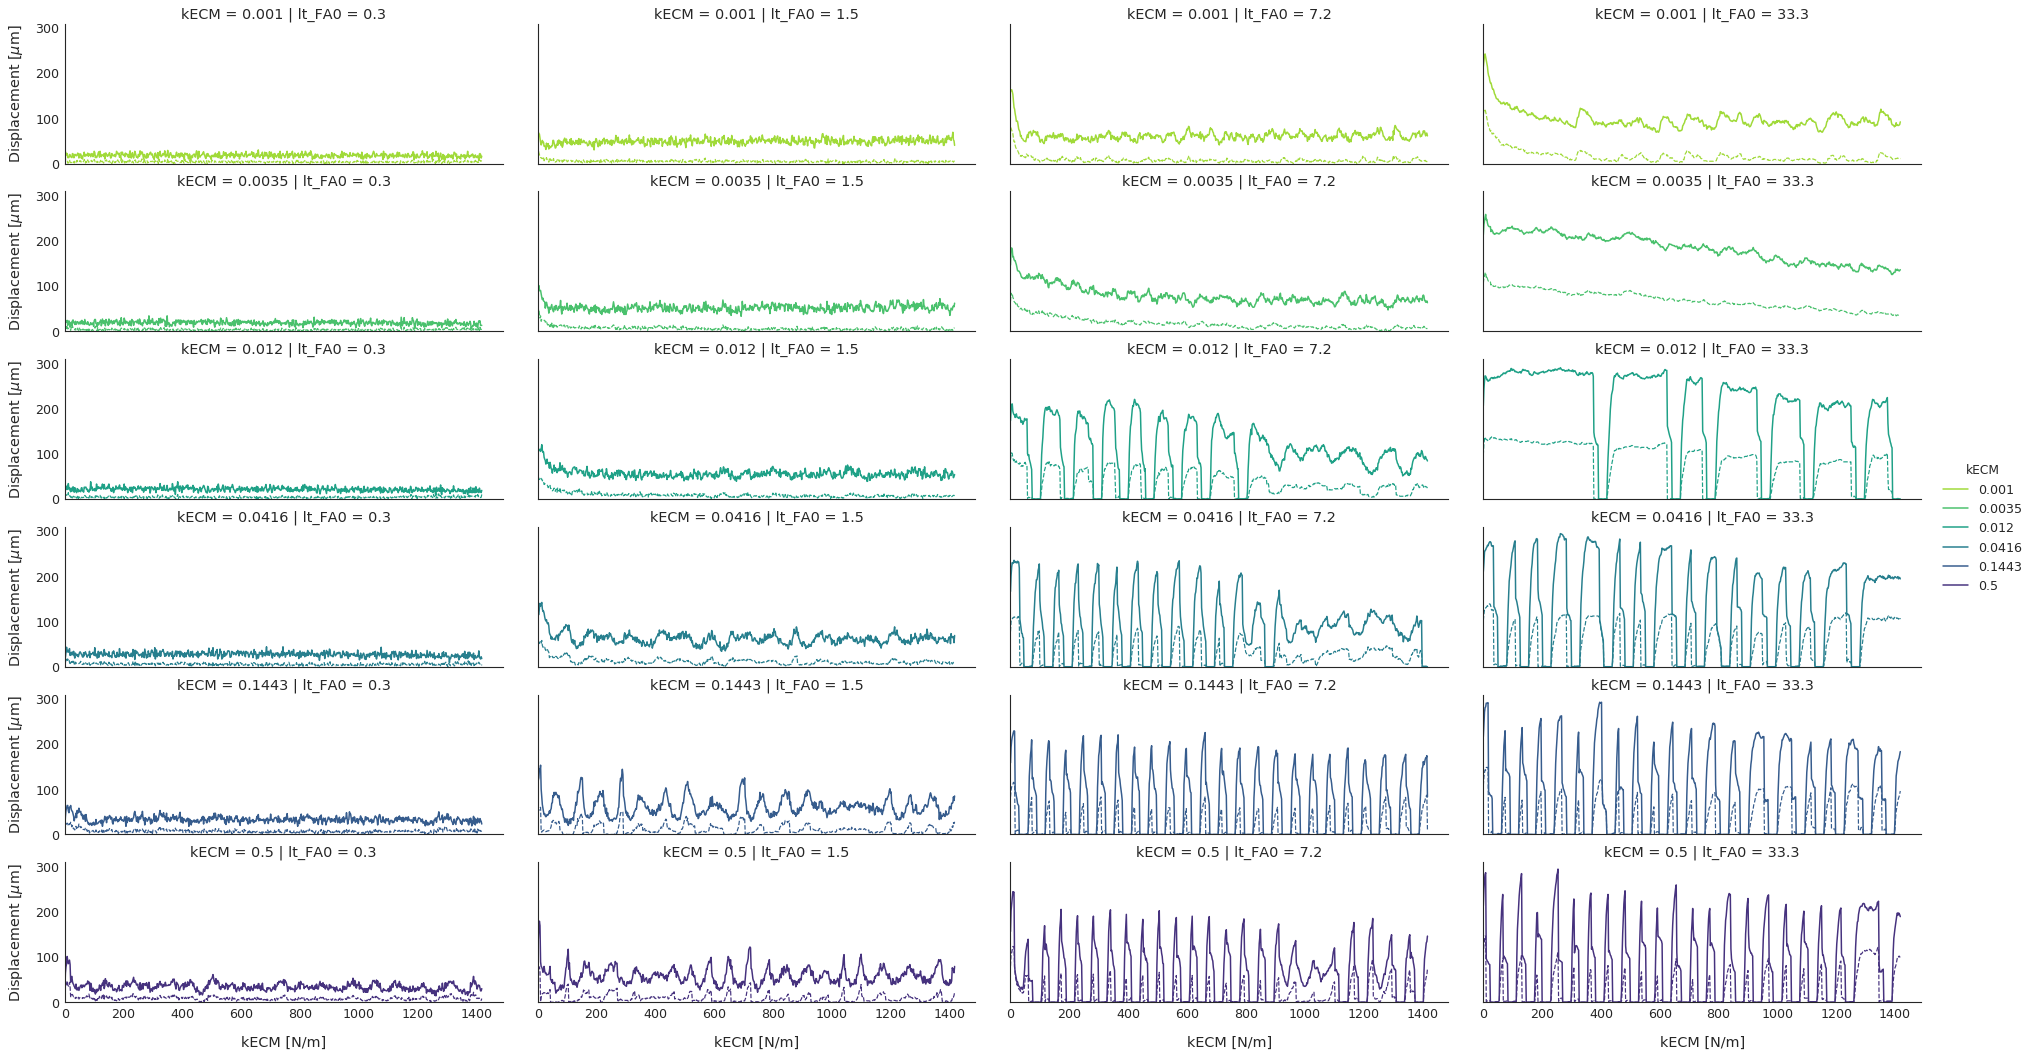

In [769]:
### NFA_BACK FINAL VALUES
g = sns.FacetGrid(data[data['sim_num'] == 1], col='lt_FA0', row="kECM", hue="kECM", aspect=2.5, size=3, gridspec_kws={"wspace": 0.08})

g = (g.map(plt.plot, "time", 'nFA_back', ls='--'), g.map(plt.plot,'time','nFA', lw=1.5)
     .add_legend()
     .set_ylabels("Displacement [$\mu$m]", labelpad=10)
     .set_xlabels("kECM [N/m]", labelpad=15)
     .set(xlim=(0,None), ylim=(0,None)))

In terms of the shape of the signal, it is very similar in both cases, but it is possible to see that, for many cases, the number of FAs in the back seems to be quite low, even close to zero, even though the total number of FAs is significantly higher. Taking sample 2 and sample 12, for example, sample 12 has around 40% of total FAs in the back, whereas sample 2 only has 10%. 

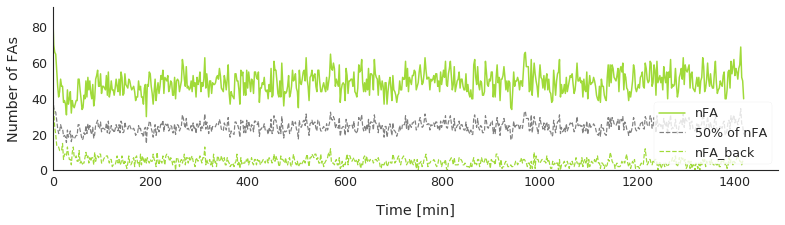

In [779]:
### LOW NFA_BACK EXAMPLE (SAMPLE 2)
plt.figure(figsize=(13,3))
criteria1 = data['samp_num'] == 2
criteria2 = data['sim_num'] == 1
criteria = criteria1 & criteria2

plt.plot(data['time'][criteria], data['nFA'][criteria], lw=1.5, color='C0')
plt.plot(data['time'][criteria], data['nFA'][criteria]/2, ls='--', color='gray', label='50% of nFA')
plt.plot(data['time'][criteria], data['nFA_back'][criteria], ls='--', color='C0')
plt.xlim(0, None)
plt.ylim(0, None)
plt.xlabel('Time [min]', labelpad=15)
plt.ylabel('Number of FAs', labelpad=10)
plt.legend(loc='lower right')
sns.despine()

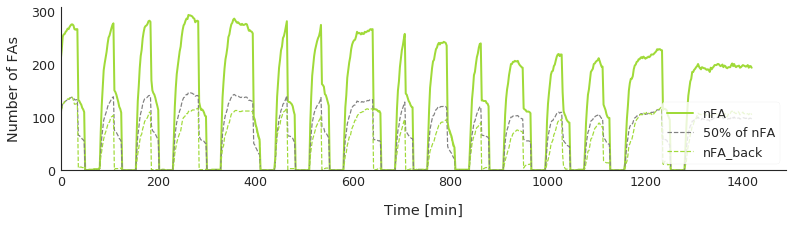

In [781]:
### HIGH NFA_BACK VALUE (SAMPLE 12)
plt.figure(figsize=(13,3))
criteria1 = data['samp_num'] == 12
criteria2 = data['sim_num'] == 1
criteria = criteria1 & criteria2

plt.plot(data['time'][criteria], data['nFA'][criteria], lw=2, color='C0')
plt.plot(data['time'][criteria], data['nFA'][criteria]/2, ls='--', color='gray', label='50% of nFA')
plt.plot(data['time'][criteria], data['nFA_back'][criteria], ls='--', color='C0')
plt.xlim(0, None)
plt.ylim(0, None)
plt.xlabel('Time [min]', labelpad=15)
plt.ylabel('Number of FAs', labelpad=10)
plt.legend(loc='lower right')
sns.despine()

Plotting the nodes' position for the nodes at the base of the cell, and coloring them based on whether there is a FA in that node, for different timesteps, the following figures are obtained:

([], <a list of 0 Text yticklabel objects>)

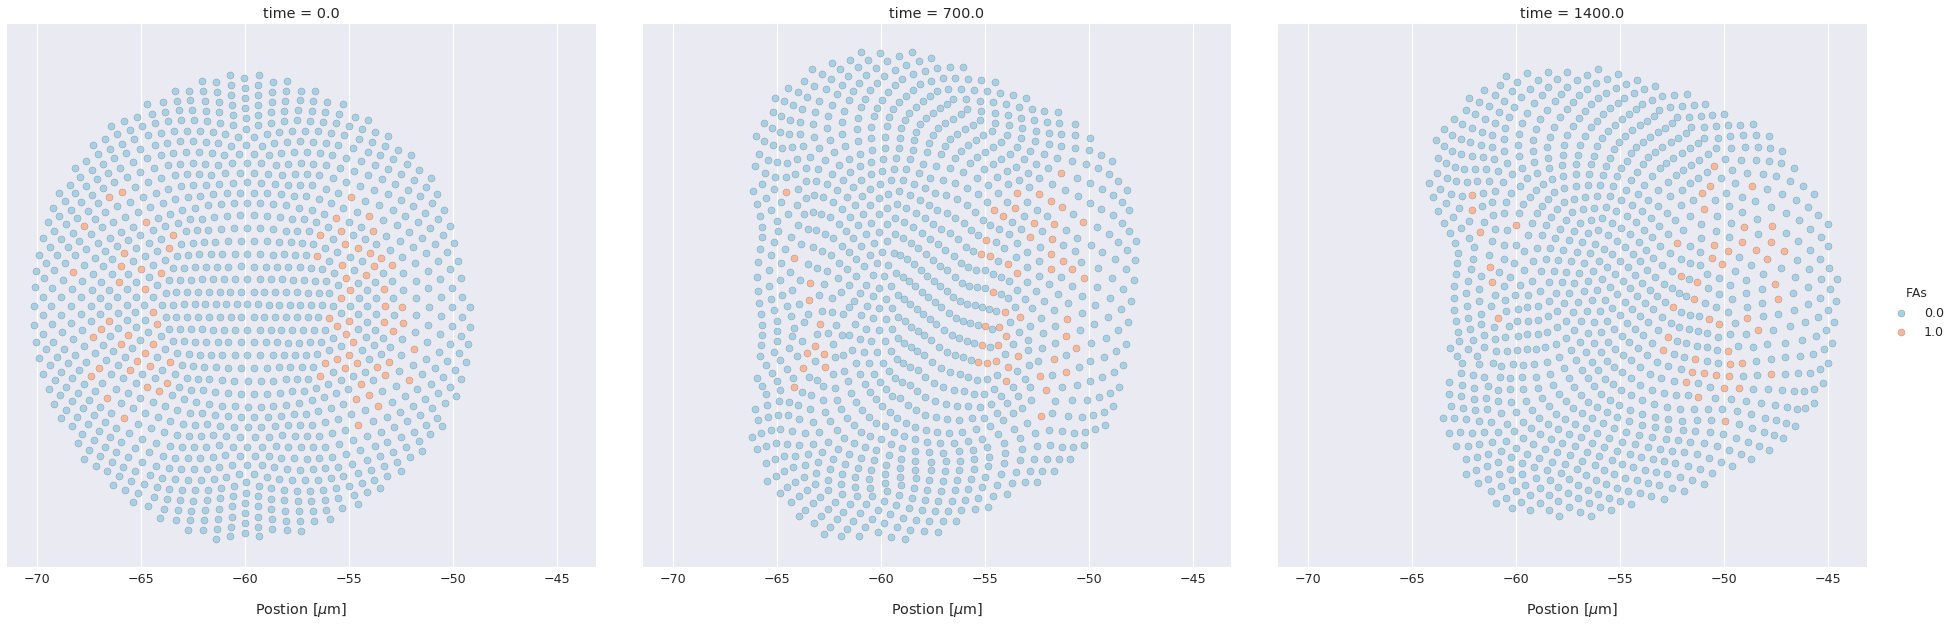

In [27]:
### NFA_BACK VTP EXAMPLE (SAMPLE 02)
nodesData = VTP_tools.getNodesData([0,350,700], 'AON_FON/extract_files/sample_10/')
sns.set_style('darkgrid')
sns.set_palette('RdBu_r',2)
newNodesData = nodesData[nodesData['z'] < 0]

g = sns.FacetGrid(newNodesData, col='time', hue="atFA", size=10, gridspec_kws={"wspace": 0.08})

g = (g.map(sns.scatterplot, 'x', 'y', s=50, edgecolor='k', lw=0.15)
     .add_legend(title='FAs')
     .set_ylabels('')
     .set_xlabels('Postion [$\mu$m]', labelpad=15))

#plt.xticks([])
sns.despine(left=True)
plt.yticks([])

([], <a list of 0 Text yticklabel objects>)

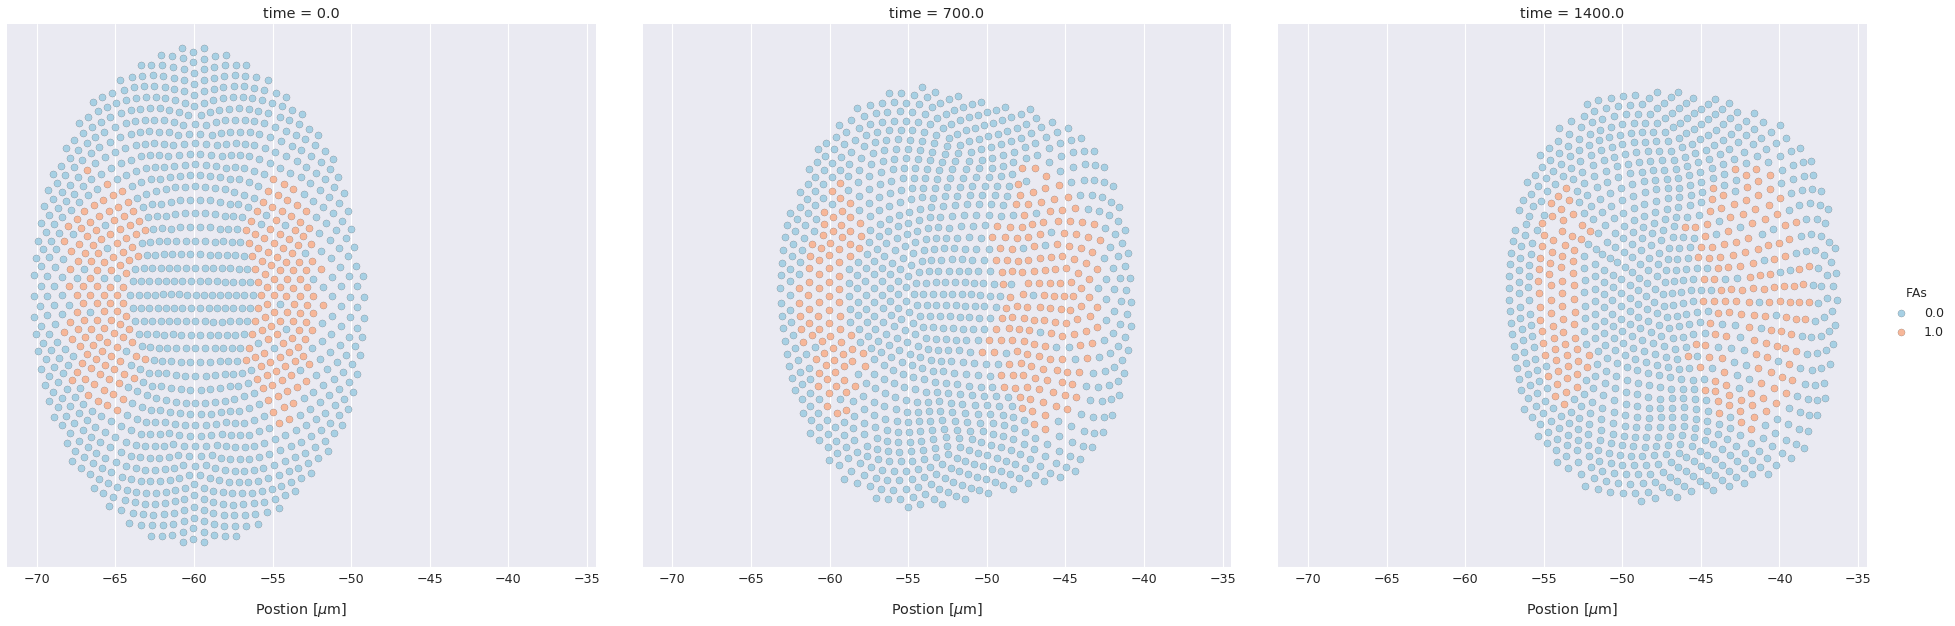

In [33]:
### NFA_BACK VTP EXAMPLE (SAMPLE 18)
nodesData = VTP_tools.getNodesData([0,350,700], 'AON_FON/extract_files/sample_12//')
sns.set_style('darkgrid')
sns.set_palette('RdBu_r',2)
newNodesData = nodesData[nodesData['z'] < 0]

g = sns.FacetGrid(newNodesData, col='time', hue="atFA", size=10, gridspec_kws={"wspace": 0.08})

g = (g.map(sns.scatterplot, 'x', 'y', s=50, edgecolor='k', lw=0.15)
     .add_legend(title='FAs')
     .set_ylabels('')
     .set_xlabels('Postion [$\mu$m]', labelpad=15))

#plt.xticks([])
sns.despine(left=True)
plt.yticks([])

Focusing on only the number of FAs and not on the displacement cell, it is possible to plot the cell's initial position and color the nodes according to the number of FAs they have during the simulation. In this case, red nodes correspond to nodes with more adhesions, while blue ones correspond to nodes with less adhesions. It must be noted that the lifetime of the adhesions is not being taken into account: a FA that already existed in the last timestep will still be counted as new one.

([], <a list of 0 Text yticklabel objects>)

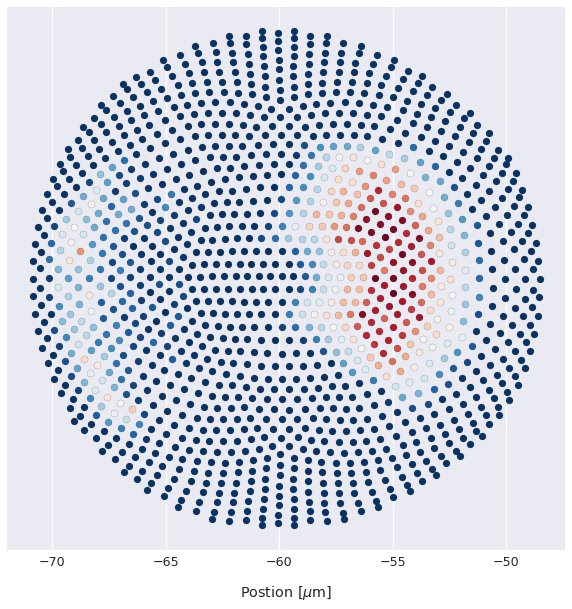

In [28]:
### ADHESIONS SUM (SAMPLE 02)
path = 'AON_FON/extract_files/sample_10/'

nodesFA = pd.DataFrame(np.nan, index=range(0,2562), columns=range(0,700))

for time in range(0,700):
    filename = path + 'cell_cell_triangles_' + str(time) + '.vtp'

    ### SETTING UP THE READER ###
    reader = vtk.vtkXMLPolyDataReader()
    reader.SetFileName(filename)
    reader.Update()
    
    ### GET DATA FROM FILE ###
    data = reader.GetOutput()
    points = data.GetPoints()
    atFA = vtk_to_numpy(data.GetPointData().GetArray('atFA'))
    
    nodesFA[time] = atFA

nodesFA['count'] = nodesFA.sum(axis=1)
nodesData = VTP_tools.getNodesData(0, path)
nodesData['count'] = nodesFA['count']

newNodesData = nodesData[nodesData['z'] < .5]
sns.set_style('darkgrid')
g = sns.FacetGrid(newNodesData, hue="count", size=10, gridspec_kws={"wspace": 0.08}, palette="RdBu_r")

g = (g.map(sns.scatterplot, 'x', 'y', s=50, edgecolor='k', lw=0.15)
     .set_ylabels('')
     .set_xlabels('Postion [$\mu$m]', labelpad=15))

#plt.xticks([])
sns.despine(left=True)
plt.yticks([])

([], <a list of 0 Text yticklabel objects>)

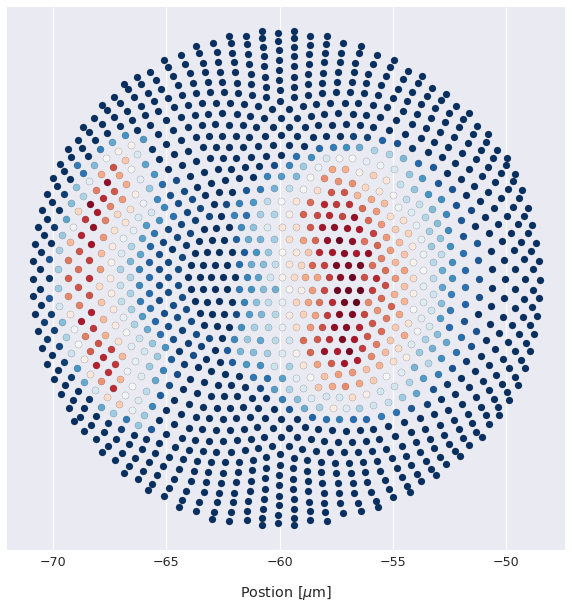

In [25]:
### ADHESIONS SUM (SAMPLE 18)
path = 'AON_FON/extract_files/sample_12/'

nodesFA = pd.DataFrame(np.nan, index=range(0,2562), columns=range(0,700))

for time in range(0,700):
    filename = path + 'cell_cell_triangles_' + str(time) + '.vtp'

    ### SETTING UP THE READER ###
    reader = vtk.vtkXMLPolyDataReader()
    reader.SetFileName(filename)
    reader.Update()
    
    ### GET DATA FROM FILE ###
    data = reader.GetOutput()
    points = data.GetPoints()
    atFA = vtk_to_numpy(data.GetPointData().GetArray('atFA'))
    
    nodesFA[time] = atFA

nodesFA['count'] = nodesFA.sum(axis=1)
nodesData = VTP_tools.getNodesData(0, path)
nodesData['count'] = nodesFA['count']

newNodesData = nodesData[nodesData['z'] < .5]
sns.set_style('darkgrid')
g = sns.FacetGrid(newNodesData, hue="count", size=10, gridspec_kws={"wspace": 0.08}, palette="RdBu_r")

g = (g.map(sns.scatterplot, 'x', 'y', s=50, edgecolor='k', lw=0.15)
     .set_ylabels('')
     .set_xlabels('Postion [$\mu$m]', labelpad=15))

#plt.xticks([])
sns.despine(left=True)
plt.yticks([])

In all of the previous plots, it is clear that the ratio of number of FAs in the back is much lower for sample 02 than for sample 18. The question here is if this has any any affect on migration. In order to answer it, it is necessary to look at both the **displacement** and the **nFA_back/nFA ratio**.

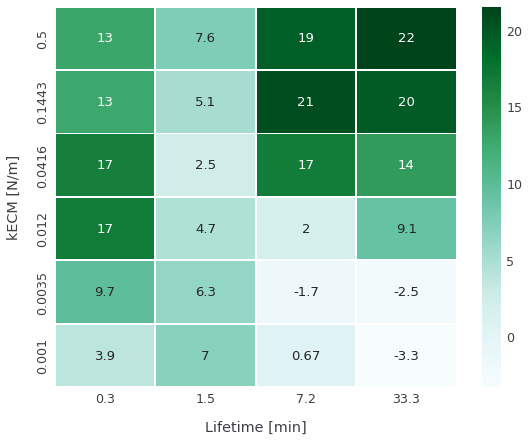

In [40]:
### DISPLACEMENT HEATMAP
data = h5_tools.getAbsDisp(data, jumpsValues)
finalMetrics = h5_tools.getFinalMetrics(data, jumpsValues, params)
h5_tools.plotMetricHeatMap('sum_disp', finalMetrics, params)

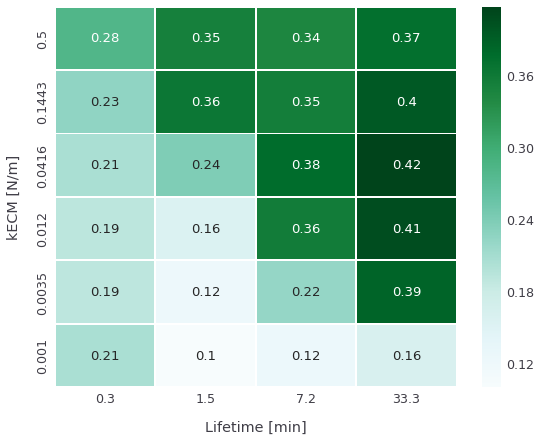

In [42]:
### RATIO HEATMATP
h5_tools.plotMetricHeatMap('nFA_perc', finalMetrics, params)

There is not a clear relationship between ratio and displacement: **in some cases** (i.e, lt_FA0 = 33.3; kECM = 0.0035) **a high ratio leads to no migration at all, and in others a low ratio** (i.e, lt_FA0 = 0.3; kECM = 0.012) **can still guarantee a relatively long distance**. Nonetheless, when samples are sorted into their migration type groups, some patterns begin to be visible.

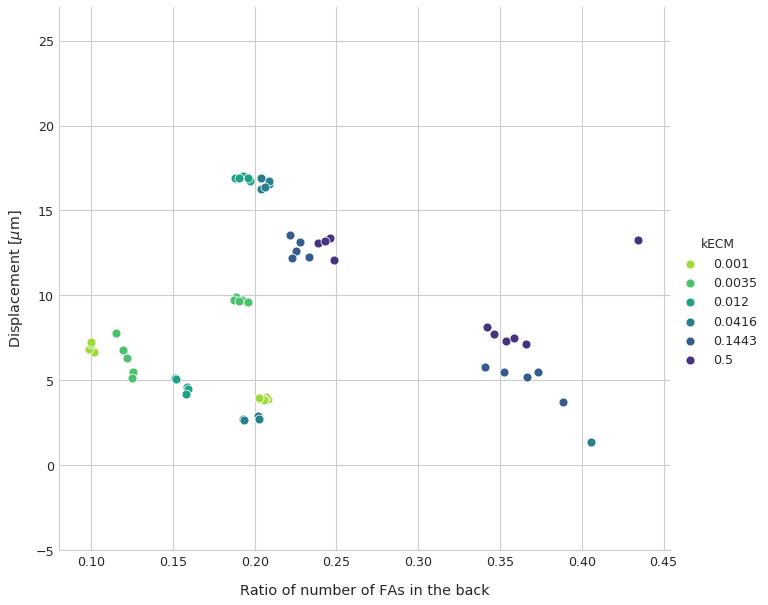

In [304]:
### SCATTER PROTRUSTION BASED
sns.set_palette('viridis_r',6)
sns.set_style('whitegrid')

g = sns.FacetGrid(finalMetrics[(finalMetrics['lt_FA0'] == .3) | (finalMetrics['lt_FA0'] == 1.5)], hue="kECM", size=10, gridspec_kws={"wspace": 0.08})

g = (g.map(sns.scatterplot, 'nFA_perc', 'sum_disp', s=80)
     .add_legend()
     .set(ylim=(-5,27))
     .set_xlabels('Ratio of number of FAs in the back', labelpad=15)
     .set_ylabels('Displacement [$\mu$m]', labelpad=10))


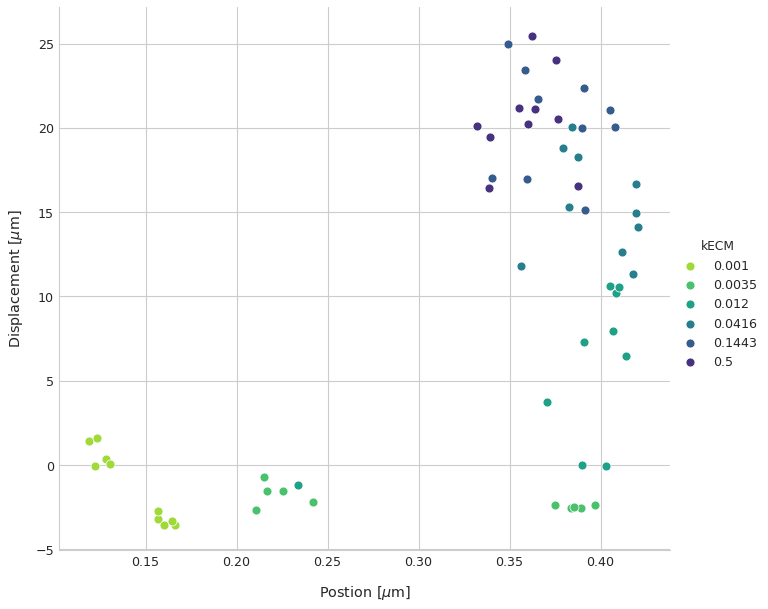

In [305]:
### SCATTER CONTRACTION BASED
sns.set_palette('viridis_r',6)
sns.set_style('whitegrid')

g = sns.FacetGrid(finalMetrics[(finalMetrics['lt_FA0'] == 7.2) | (finalMetrics['lt_FA0'] == 33.3)], hue="kECM", size=10, gridspec_kws={"wspace": 0.08})

g = (g.map(sns.scatterplot, 'nFA_perc', 'sum_disp',s=80)
     .add_legend()
     .set_xlabels('Postion [$\mu$m]', labelpad=15)
     .set_ylabels('Displacement [$\mu$m]', labelpad=10))

- For protrusion based migration, **there is no clear distinction between kECM stiffnesses**: there are samples with high a stiffness value that have a low ratio (although the opposite does not happen). However, for contraction based, there is a **clear separation**: samples with low stiffness have lower ratios and samples with higher stiffnesses have higher ratios;
- For protrusion based migration, **higher ratios actually mean less migration**: cells become attached do not not detach, or not in the necessary level to assume a contraction based migration behaviour. On the other hand, for contraction based migration, **higher ratios are associated with more displacement**.

Nevertheless, it is still not possible, nor correct, to draw a relationship between the ratio and the displacement. It surely is helpful to understand what is happening, but it is not the direct cause of the cell's displacement. 

- **Protrusion based** - the cell's displacement is not dependent on the number of FAs. Yet, when more adhesions start to form (usually associated with higher stiffnesses, the cell starts attaching to the substrate and is not able to move forward, until it assumes a contraction based migration behaviour.

<br>

However, the number of FAs can justify the negative migration occurring for contraction-based samples with low kECM. The figure below shows that, from min 200 onward, there is a more significant drop in the number of FAs, the moment where the displacement also starts to drop. Hence, it is a matter of the center of mass moving towards the back more so than actual migration.

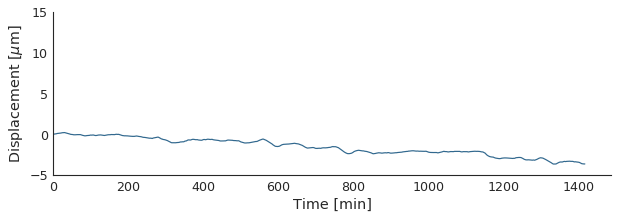

In [99]:
## DISPLACEMENT EXAMPLE PLOT ###
sns.set_style("white")
sns.set_palette('viridis_r',2)
plt.figure(figsize=(10,3))

# Plot displacement
plt.plot(data["time"][data["sim_num"] == 1][data["samp_num"] == 11], data["sum_disp"][data["sim_num"] == 1][data["samp_num"] == 0], color='C1')

# Figure aesthetics
plt.ylim(-5, 15)
plt.ylabel('Displacement [$\mu$m]')
plt.xlim(0, None)
plt.xlabel('Time [min]')
sns.despine()

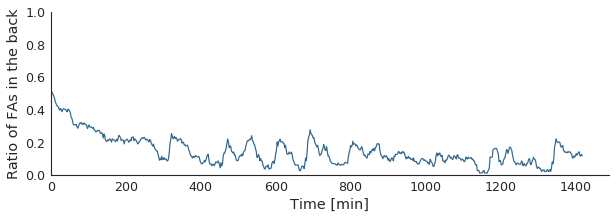

In [98]:
## DISPLACEMENT EXAMPLE PLOT ###
sns.set_style("white")
sns.set_palette('viridis_r',2)
plt.figure(figsize=(10,3))

# Plot displacement
plt.plot(data["time"][data["sim_num"] == 1][data["samp_num"] == 11], data["nFA_back"][data["sim_num"] == 1][data["samp_num"] == 0]/data["nFA"][data["sim_num"] == 1][data["samp_num"] == 0], color='C1')

# Figure aesthetics
plt.ylim(0, 1)
plt.ylabel('Ratio of FAs in the back')
plt.xlim(0, None)
plt.xlabel('Time [min]')
sns.despine()

### Lifetime/Traction/Maturation level
The mean lifetime of the FAs, the maturation level of the fibers and the traction have similar curves to that of the number of FAs, so the same type of plots will be used.

<br> 

## Comparing All Metrics - Radar plots

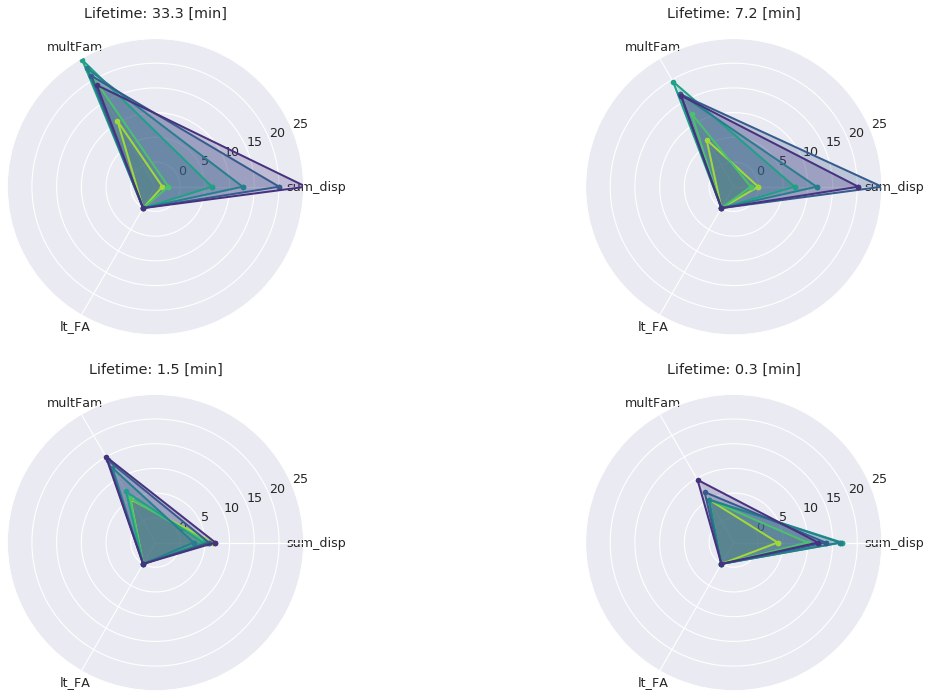

In [372]:
### RADAR
sns.set_style('dark')
sns.set_palette('viridis_r',6)
finalMetrics = finalMetrics[finalMetrics['sim_num'] == 1]
finalMetrics['lt_FA'] = finalMetrics['lt_FA']/60
finalMetrics['multFam'] = finalMetrics['multFam']*5
labels=np.array(['sum_disp', 'multFam', 'lt_FA'])

fig=plt.figure(figsize=(19,12))

for n in range(0,4):
    angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
    angles=np.concatenate((angles,[angles[0]]))
    ax = fig.add_subplot(2,2,n+1, polar=True)
    for s in range(n, 24,4):
        stats=finalMetrics.iloc[s][labels].values
        # close the plot
        stats=np.concatenate((stats,[stats[0]]))
        ax.plot(angles, stats, 'o-', linewidth=2)
        ax.fill(angles, stats, alpha=0.25)
        
    ax.set_thetagrids(angles * 180/np.pi, labels)
    ax.set_title('Lifetime: ' + str(finalMetrics['lt_FA0'].iloc[s]) + ' [min]')
    ax.set_ylim(-5,25)

    #ax.set_title([.loc[386,"Name"]])
    ax.grid(True)
    
#plt.tight_layout()